# Introduction
This project explores the key factors associated with depression among students using a survey dataset. By analyzing variables such as sleep duration, dietary habits, academic pressure, financial stress, and personal history, we aim to uncover patterns linked to depression. The analysis also examines gender-based differences to understand how these relationships may vary across male and female students.

In [23]:
## Loading packages and dataset
library(tidyverse)
library(skimr)
library(plotly)

depression_df <- read.csv("/kaggle/input/depression-student-dataset/Depression Student Dataset.csv")

In [82]:
head(depression_df)
tail(depression_df)
skim(depression_df)

,Gender,Age,Academic.Pressure,Study.Satisfaction,Sleep.Duration,Dietary.Habits,Have.you.ever.had.suicidal.thoughts..,Study.Hours,Financial.Stress,Family.History.of.Mental.Illness,Depression,AgeGroup
,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,Male,28,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No,26–29
2,Male,28,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No,26–29
3,Male,25,1,3,5-6 hours,Unhealthy,Yes,10,4,No,Yes,22–25
4,Male,23,1,4,More than 8 hours,Unhealthy,Yes,7,2,Yes,No,22–25
5,Female,31,1,5,More than 8 hours,Healthy,Yes,4,2,Yes,No,30–32
6,Male,19,4,4,5-6 hours,Unhealthy,Yes,1,4,Yes,Yes,18–21


,Gender,Age,Academic.Pressure,Study.Satisfaction,Sleep.Duration,Dietary.Habits,Have.you.ever.had.suicidal.thoughts..,Study.Hours,Financial.Stress,Family.History.of.Mental.Illness,Depression,AgeGroup
,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
497,Male,29,3,1,7-8 hours,Unhealthy,Yes,9,3,Yes,Yes,26–29
498,Male,26,5,2,More than 8 hours,Unhealthy,No,8,3,No,Yes,26–29
499,Male,24,2,1,Less than 5 hours,Unhealthy,Yes,8,5,No,Yes,22–25
500,Female,23,3,5,5-6 hours,Healthy,No,1,5,Yes,No,22–25
501,Male,33,4,4,More than 8 hours,Healthy,No,8,1,Yes,No,33–34
502,Male,18,5,3,More than 8 hours,Unhealthy,No,6,2,Yes,Yes,18–21


── Data Summary ────────────────────────
                           Values       
Name                       depression_df
Number of rows             502          
Number of columns          12           
_______________________                 
Column type frequency:                  
  factor                   7            
  numeric                  5            
________________________                
Group variables            None         

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable                         n_missing complete_rate ordered n_unique
1 Gender                                        0             1 FALSE          2
2 Sleep.Duration                                0             1 FALSE          4
3 Dietary.Habits                                0             1 FALSE          3
4 Have.you.ever.had.suicidal.thoughts..         0             1 FALSE          2
5 Family.History.of.Mental.Illness              0             

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 15' in coercion to 'logical(1)'


In [83]:
## Checking the column names
names(depression_df)

[1] "Gender"                               
 [2] "Age"                                  
 [3] "Academic.Pressure"                    
 [4] "Study.Satisfaction"                   
 [5] "Sleep.Duration"                       
 [6] "Dietary.Habits"                       
 [7] "Have.you.ever.had.suicidal.thoughts.."
 [8] "Study.Hours"                          
 [9] "Financial.Stress"                     
[10] "Family.History.of.Mental.Illness"     
[11] "Depression"                           
[12] "AgeGroup"

# Data Cleaning

In [80]:
## Changing datatype from character to factor
cols_to_factor <- c(
  "Gender",
  "Sleep.Duration",
  "Dietary.Habits",
  "Have.you.ever.had.suicidal.thoughts..",
  "Family.History.of.Mental.Illness",
  "Depression"
)

depression_df[cols_to_factor] <- lapply(depression_df[cols_to_factor], as.factor)
head(depression_df)

,Gender,Age,Academic.Pressure,Study.Satisfaction,Sleep.Duration,Dietary.Habits,Have.you.ever.had.suicidal.thoughts..,Study.Hours,Financial.Stress,Family.History.of.Mental.Illness,Depression,AgeGroup
,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,Male,28,2,4,7-8 hours,Moderate,Yes,9,2,Yes,No,26–29
2,Male,28,4,5,5-6 hours,Healthy,Yes,7,1,Yes,No,26–29
3,Male,25,1,3,5-6 hours,Unhealthy,Yes,10,4,No,Yes,22–25
4,Male,23,1,4,More than 8 hours,Unhealthy,Yes,7,2,Yes,No,22–25
5,Female,31,1,5,More than 8 hours,Healthy,Yes,4,2,Yes,No,30–32
6,Male,19,4,4,5-6 hours,Unhealthy,Yes,1,4,Yes,Yes,18–21


In [5]:
## Summary of different columns in the dataset
depression_df %>%
    select(Age, Academic.Pressure, Study.Satisfaction, Study.Hours, Financial.Stress) %>%
    summary()
    

      Age        Academic.Pressure Study.Satisfaction  Study.Hours    
 Min.   :18.00   Min.   :1.000     Min.   :1.000      Min.   : 0.000  
 1st Qu.:22.00   1st Qu.:2.000     1st Qu.:2.000      1st Qu.: 3.000  
 Median :26.50   Median :3.000     Median :3.000      Median : 7.000  
 Mean   :26.24   Mean   :3.004     Mean   :3.076      Mean   : 6.404  
 3rd Qu.:30.00   3rd Qu.:4.000     3rd Qu.:4.000      3rd Qu.:10.000  
 Max.   :34.00   Max.   :5.000     Max.   :5.000      Max.   :12.000  
 Financial.Stress
 Min.   :1.000   
 1st Qu.:2.000   
 Median :3.000   
 Mean   :2.928   
 3rd Qu.:4.000   
 Max.   :5.000   

# Analysis 

In [81]:
## Summary of different columns
depression_df %>% 
  select(Gender, Sleep.Duration, Dietary.Habits, Depression) %>% 
  summary()
glimpse(depression_df)

    Gender              Sleep.Duration   Dietary.Habits Depression
 Female:235   Less than 5 hours:123    Healthy  :161    No :250   
 Male  :267   5-6 hours        :123    Moderate :172    Yes:252   
              7-8 hours        :128    Unhealthy:169              
              More than 8 hours:128                               

Rows: 502
Columns: 12
$ Gender                                <fct> Male, Male, Male, Male, Female, …
$ Age                                   <int> 28, 28, 25, 23, 31, 19, 34, 20, …
$ Academic.Pressure                     <dbl> 2, 4, 1, 1, 1, 4, 4, 4, 1, 4, 5,…
$ Study.Satisfaction                    <dbl> 4, 5, 3, 4, 5, 4, 2, 1, 4, 3, 4,…
$ Sleep.Duration                        <fct> 7-8 hours, 5-6 hours, 5-6 hours,…
$ Dietary.Habits                        <fct> Moderate, Healthy, Unhealthy, Un…
$ Have.you.ever.had.suicidal.thoughts.. <fct> Yes, Yes, Yes, Yes, Yes, Yes, Ye…
$ Study.Hours                           <int> 9, 7, 10, 7, 4, 1, 6, 3, 10, 10,…
$ Financial.Stress                      <int> 2, 1, 4, 2, 2, 4, 2, 4, 3, 1, 4,…
$ Family.History.of.Mental.Illness      <fct> Yes, Yes, No, Yes, Yes, Yes, No,…
$ Depression                            <fct> No, No, Yes, No, No, Yes, Yes, Y…
$ AgeGroup                              <fct> 26–29, 26–29, 22–25, 22–25, 30–3…


# Visualization

## Total number of observartion vs Gender

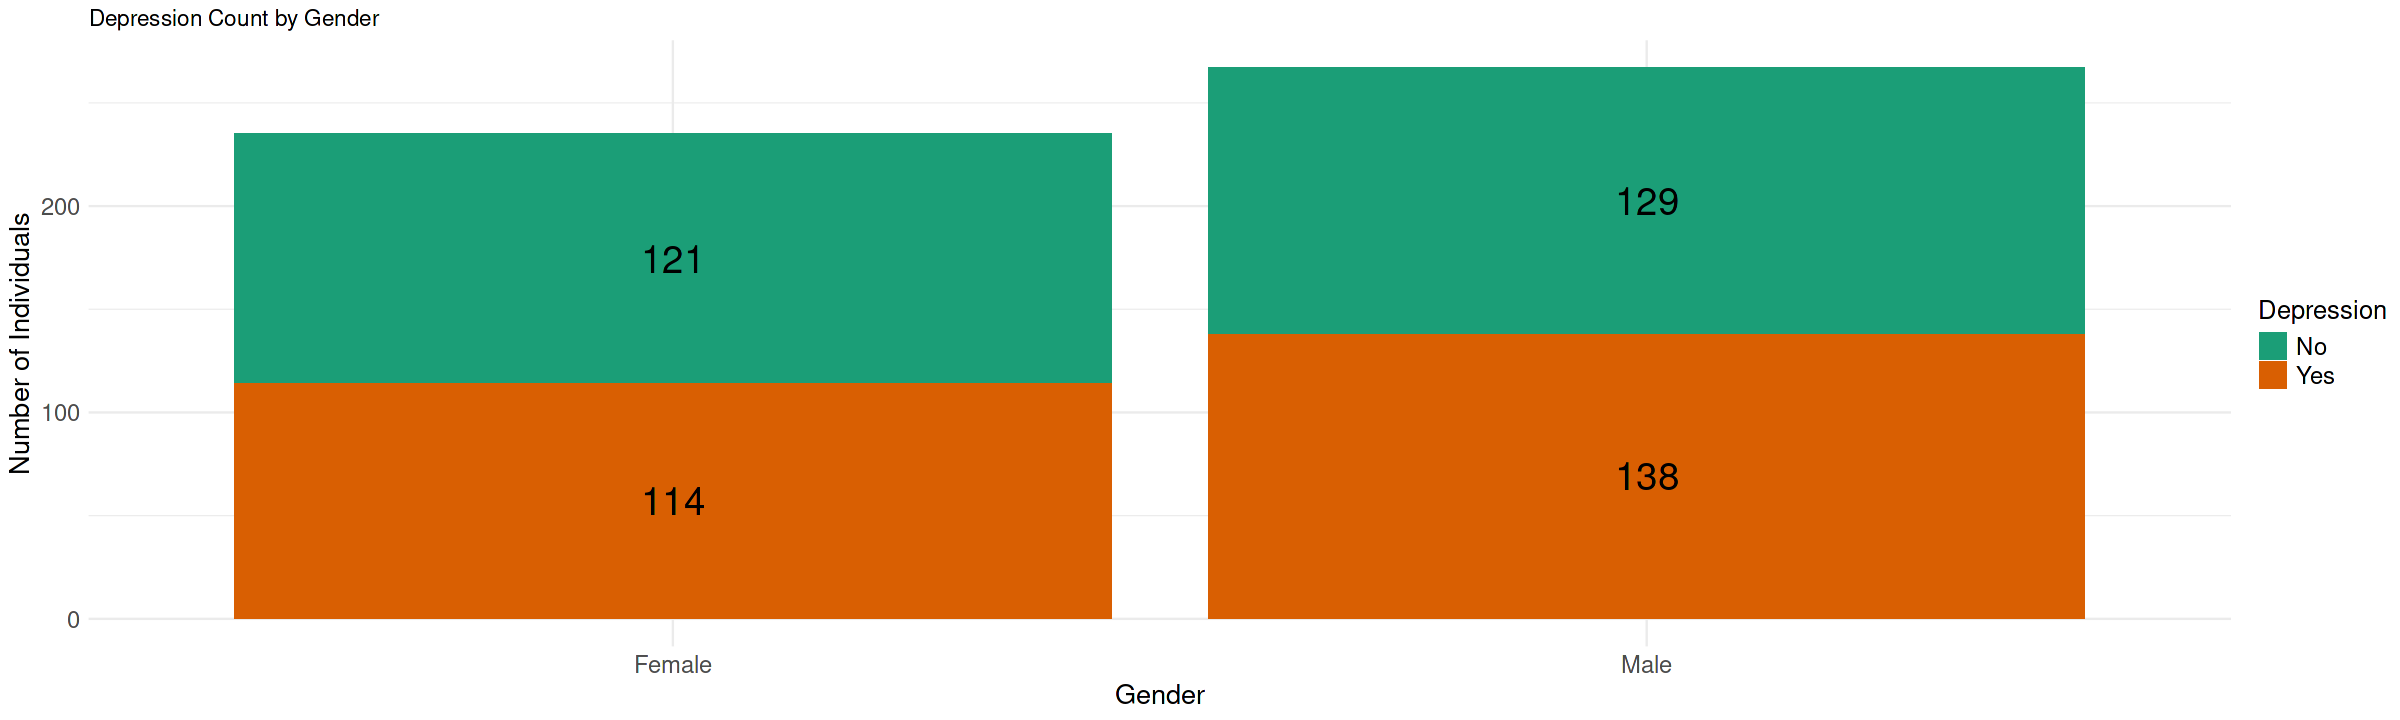

In [27]:
## Count of gender
plot_data <- depression_df %>%
  group_by(Gender, Depression) %>%
  summarise(Count = n(), .groups = "drop")

## Plot
options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(plot_data, aes(x = Gender, y = Count, fill = Depression, text = paste("Count:", Count))) +
  geom_bar(stat = "identity", position = "stack") +
  labs(title = "Depression Count by Gender", y = "Number of Individuals") +
  geom_text(aes(label = Count), position = position_stack(vjust = 0.5), size = 8) +
  scale_fill_brewer(palette = "Dark2") +  
  theme_minimal() +
  theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )
  



> **Total number of male and female are 267 and 235 out of total 502 observation. That's 53.2% and 46.8% of male and female observations. There are no missing observations.**

## Percantage of male and females who are suffering from depression

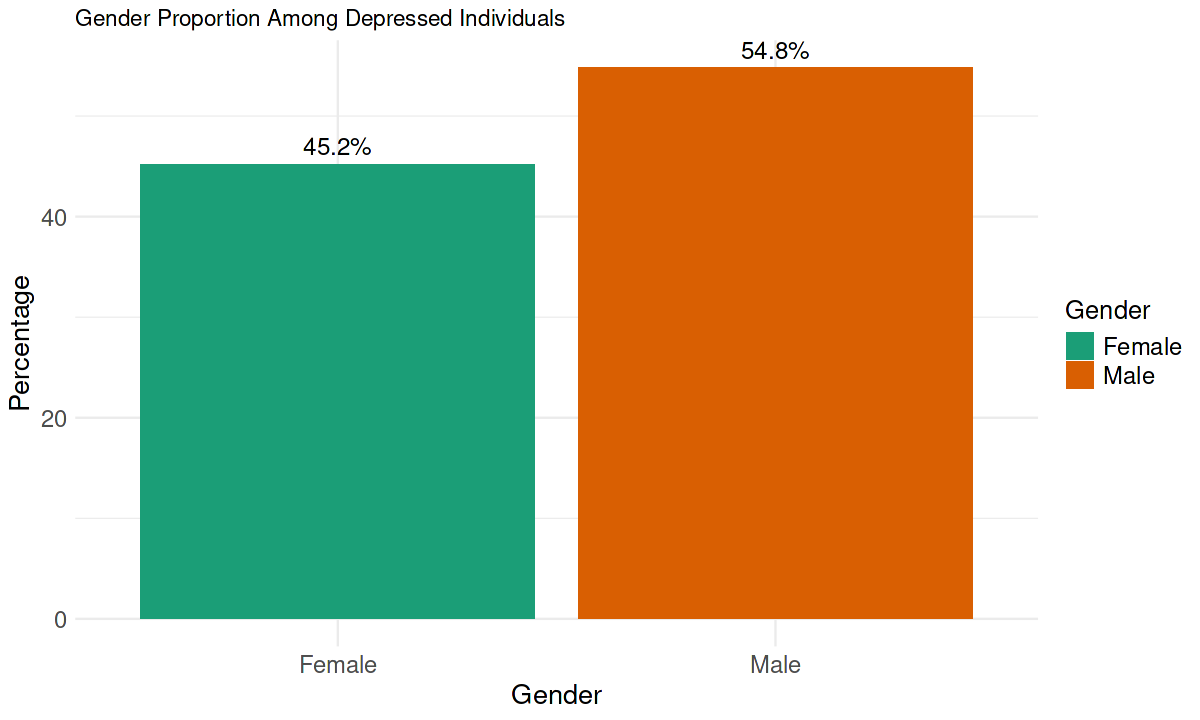

In [51]:
options(repr.plot.width = 10, repr.plot.heigth = 6)

## Count of genders according to their depression 
GenderCount <- depression_df %>%
    filter(Depression == "Yes") %>%
    count(Gender) %>%
    mutate(Percentage = round(100 * n/sum(n),1))

## Plot
ggplot(GenderCount, aes(x = Gender, y = Percentage, fill = Gender)) +
  geom_col() +
  geom_text(aes(label = paste0(Percentage, "%")), vjust = -0.5, size = 5) +
  labs(title = "Gender Proportion Among Depressed Individuals", y = "Percentage") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )

> **45.2 % of females are suffering from depression as opposed to 54.8 % of male. So nearly half of all male and female from this particular dataset are suffering from depression.**

## Sleep Duration vs Depression 

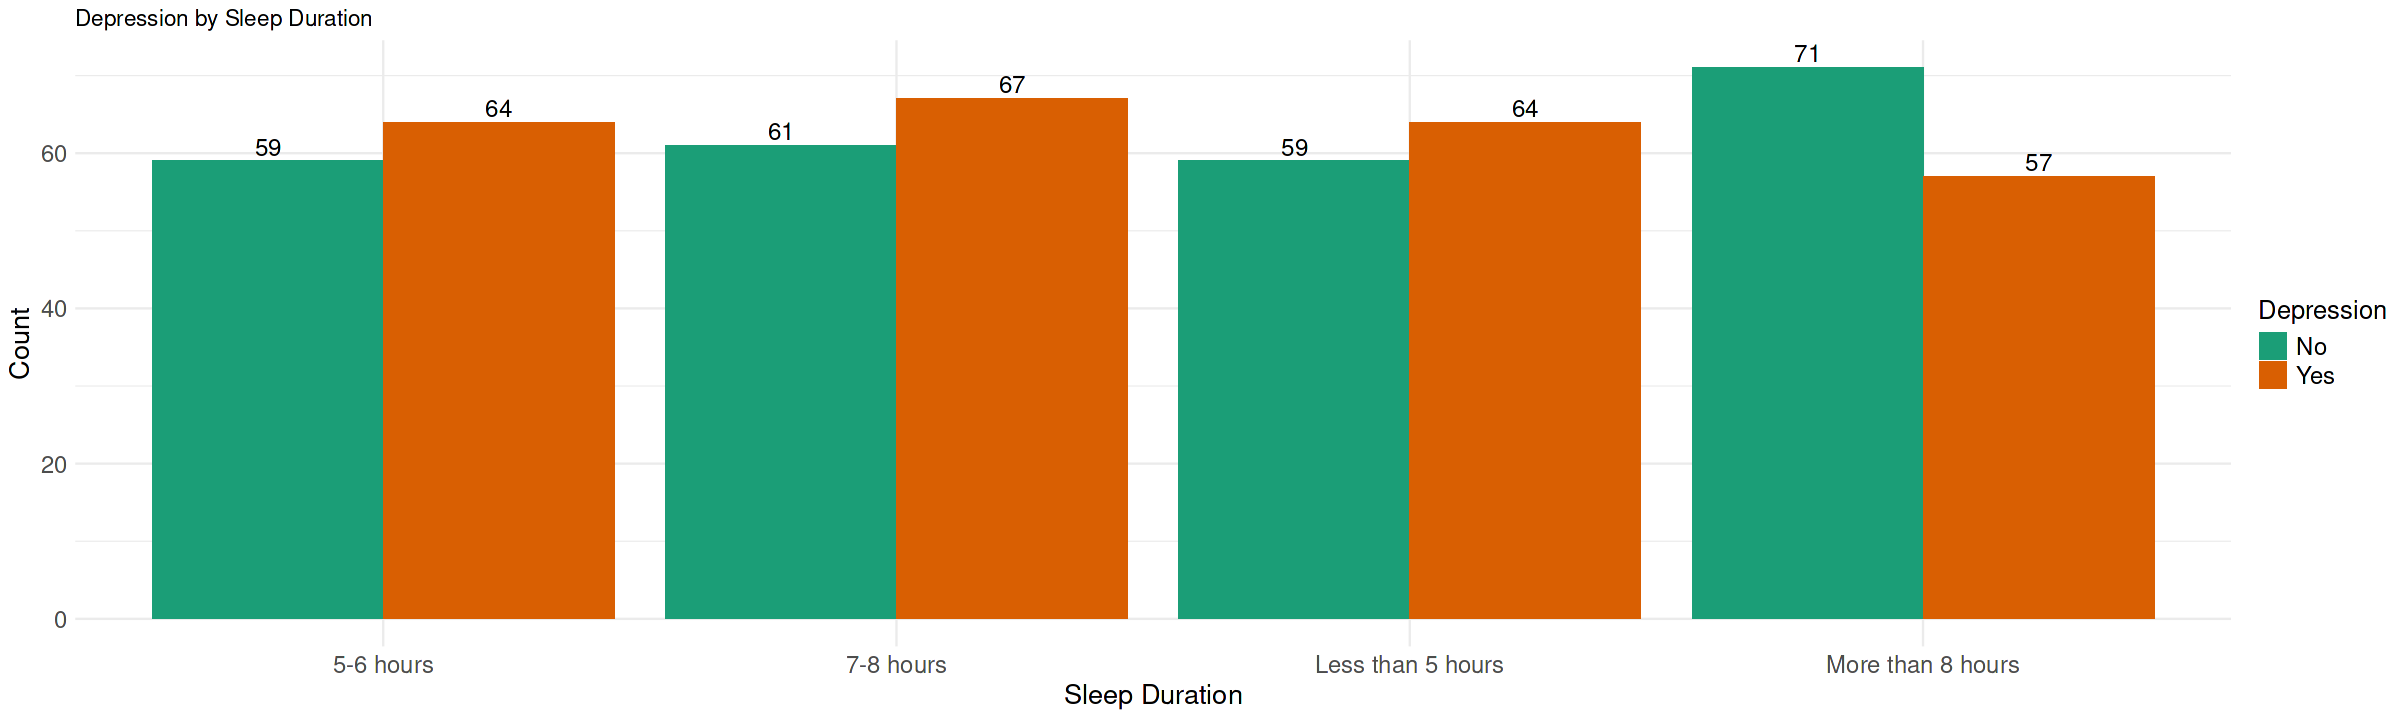

In [33]:
sleep_summary <- depression_df %>%
  group_by(Sleep.Duration, Depression) %>%
  summarise(Count = n(), .groups = "drop")

ggplot(sleep_summary, aes(x = Sleep.Duration, y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(0.9), vjust = -0.3, size = 5) +
  labs(title = "Depression by Sleep Duration", x = "Sleep Duration", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )


> * **Depression increases as sleep duration decreases.**

## Academic Pressure vs Depression

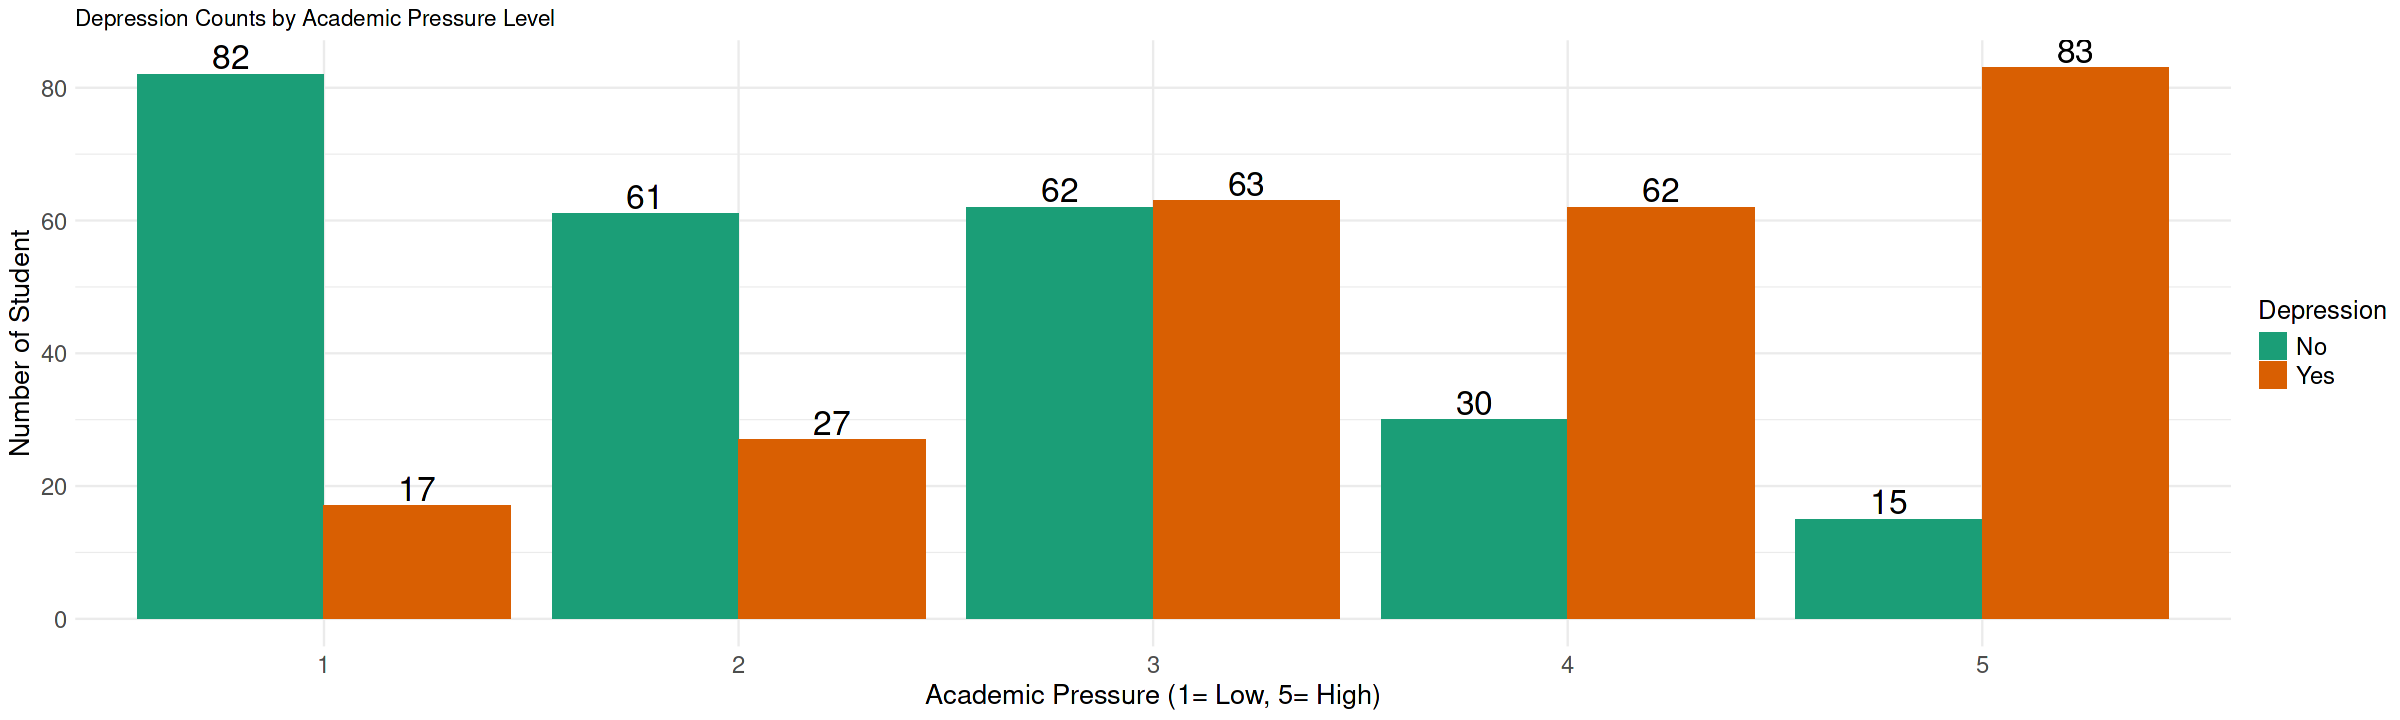

In [37]:
## Group by actual Academic.Pressure value (1 to 5) and Depression
summary <- depression_df %>%
    group_by(Academic.Pressure, Depression)%>%
     summarise(Count = n(), .groups = "drop")

## Clustered cloumn chart
options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(summary, aes(x= factor(Academic.Pressure), y = Count, fill = Depression)) +
           geom_col(position = "dodge") +
           geom_text(aes(label = Count), position = position_dodge(width= 0.9),vjust = -0.2, size = 7) +
           labs(title = "Depression Counts by Academic Pressure Level",
                x = "Academic Pressure (1= Low, 5= High)",
                y = "Number of Student") +
           scale_fill_brewer(palette = "Dark2") +
           theme_minimal() +
           theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )


> * **Depression increases as academic pressure increases.**

## Age vs Depression

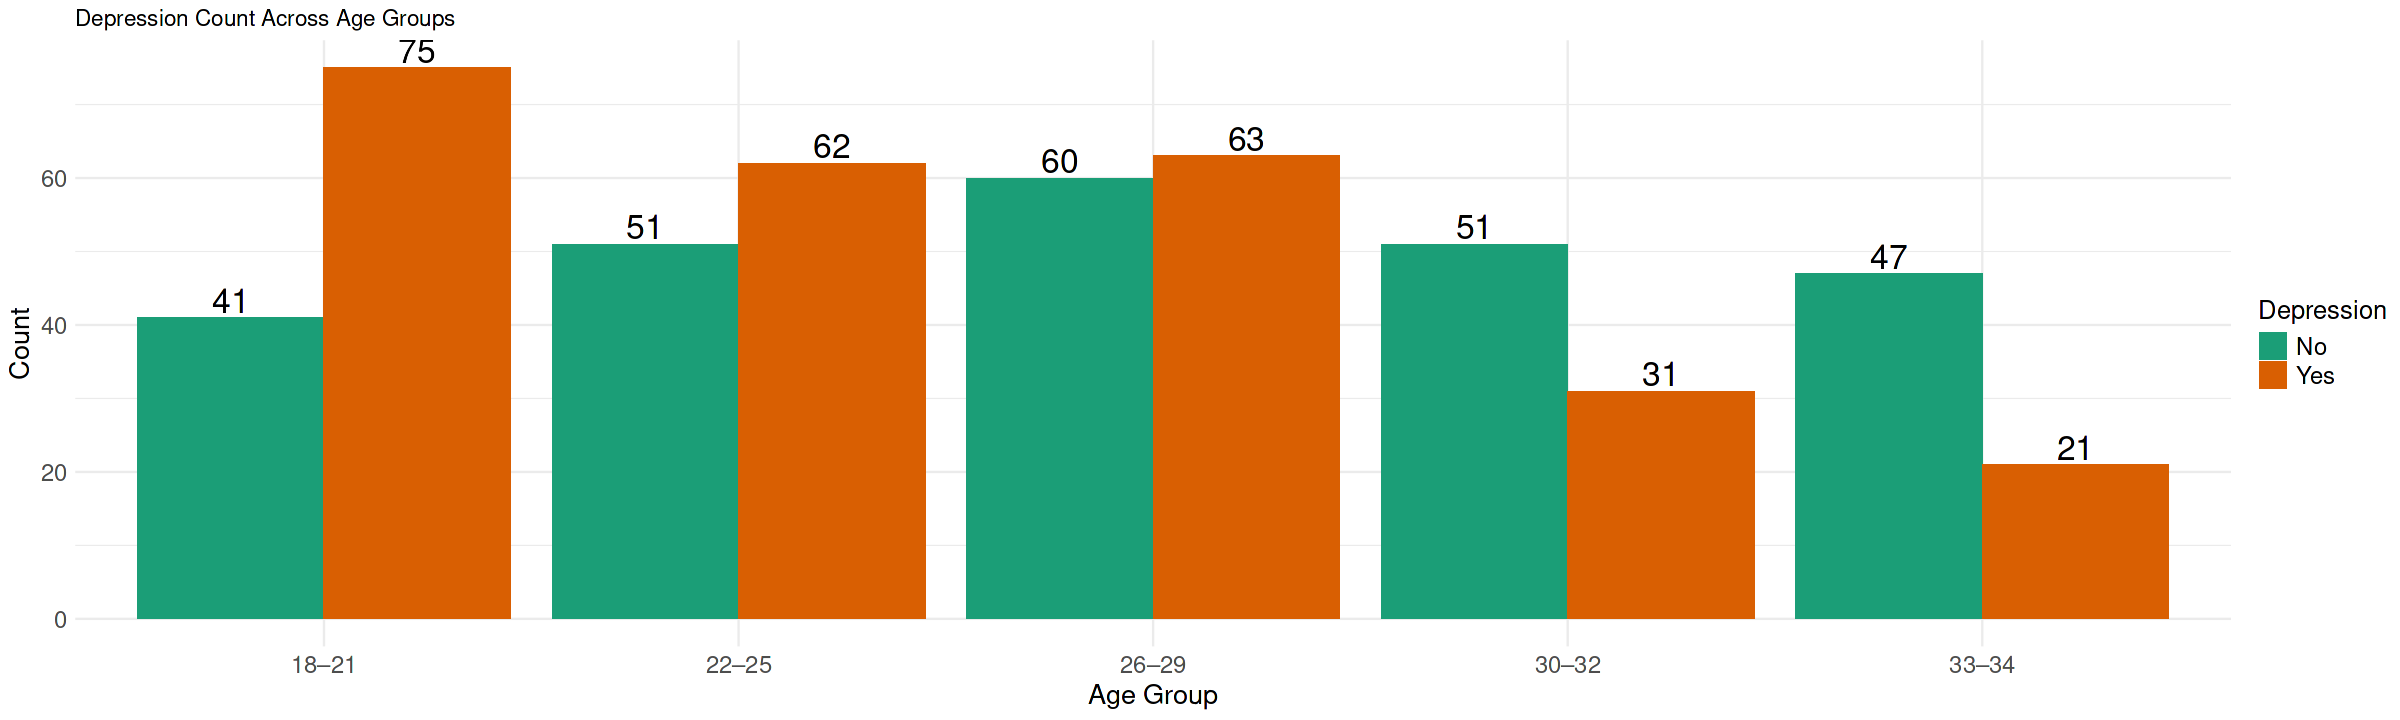

In [36]:
# Create age bins (5 bins: 18–21, 22–25, 26–29, 30–32, 33–34)
depression_df <- depression_df %>%
  mutate(AgeGroup = cut(Age, breaks = c(17, 21, 25, 29, 32, 34),
                        labels = c("18–21", "22–25", "26–29", "30–32", "33–34")))

# Count by age group and depression
age_summary <- depression_df %>%
  group_by(AgeGroup, Depression) %>%
  summarise(Count = n(), .groups = "drop")

# Plot
options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(age_summary, aes(x = AgeGroup, y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(width= 0.9),vjust = -0.2, size = 7) +
  labs(title = "Depression Count Across Age Groups", x = "Age Group", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
  theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )



> * **People from 18-21 are most depressed, while people from 22-25 and 26-29 are equally depressed. Depression decreases as age increases.**

## Financial Stress vs Depression

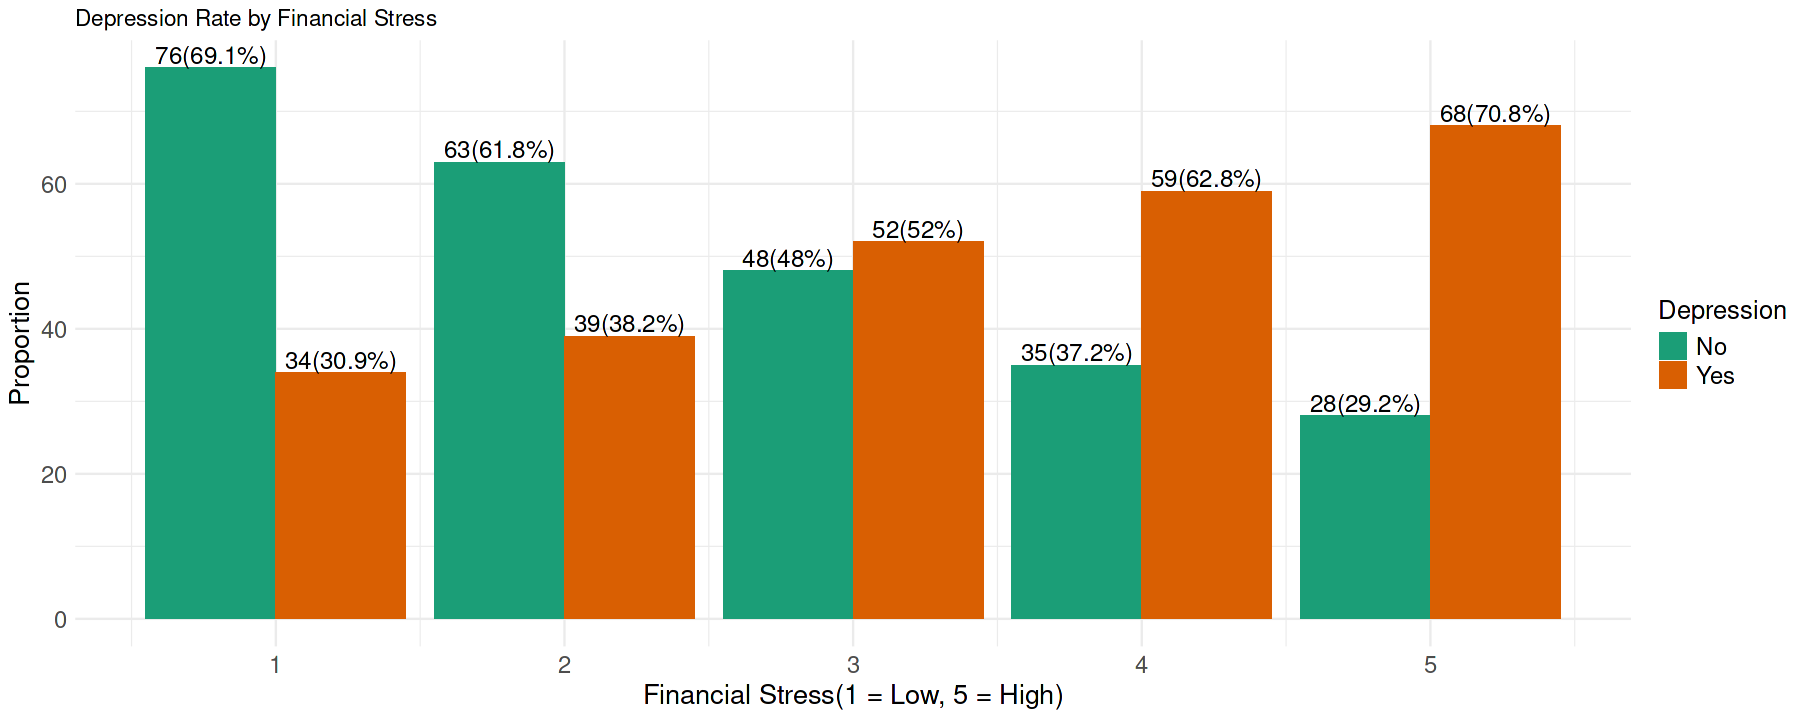

In [87]:
options(repr.plot.width = 15, repr.plot.heigth = 6)

## Count combinations and Compute proportions
fin.cal <- depression_df %>%
  count(Financial.Stress, Depression) %>%
  group_by(Financial.Stress) %>%
  mutate(Proportion = n / sum(n),
         label = paste0(round(100 * Proportion, 1), "%"))
fin <- count(depression_df, Financial.Stress, Depression)
## Plot
ggplot(fin.cal, aes(x = Financial.Stress, y=n, fill = Depression)) +
      geom_col(position = "dodge") +
      geom_text(aes(label = paste0(n,"(", label,")")), position = position_dodge(width = 0.9), vjust = -0.2, size = 5) +
      labs(title = "Depression Rate by Financial Stress", y = "Proportion", x = "Financial Stress(1 = Low, 5 = High)") +
      scale_fill_brewer(palette = "Dark2") +
      theme_minimal() +
      theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )

> * **Depression increases as financial stress increases.**

## Dietery Habits vs Depression

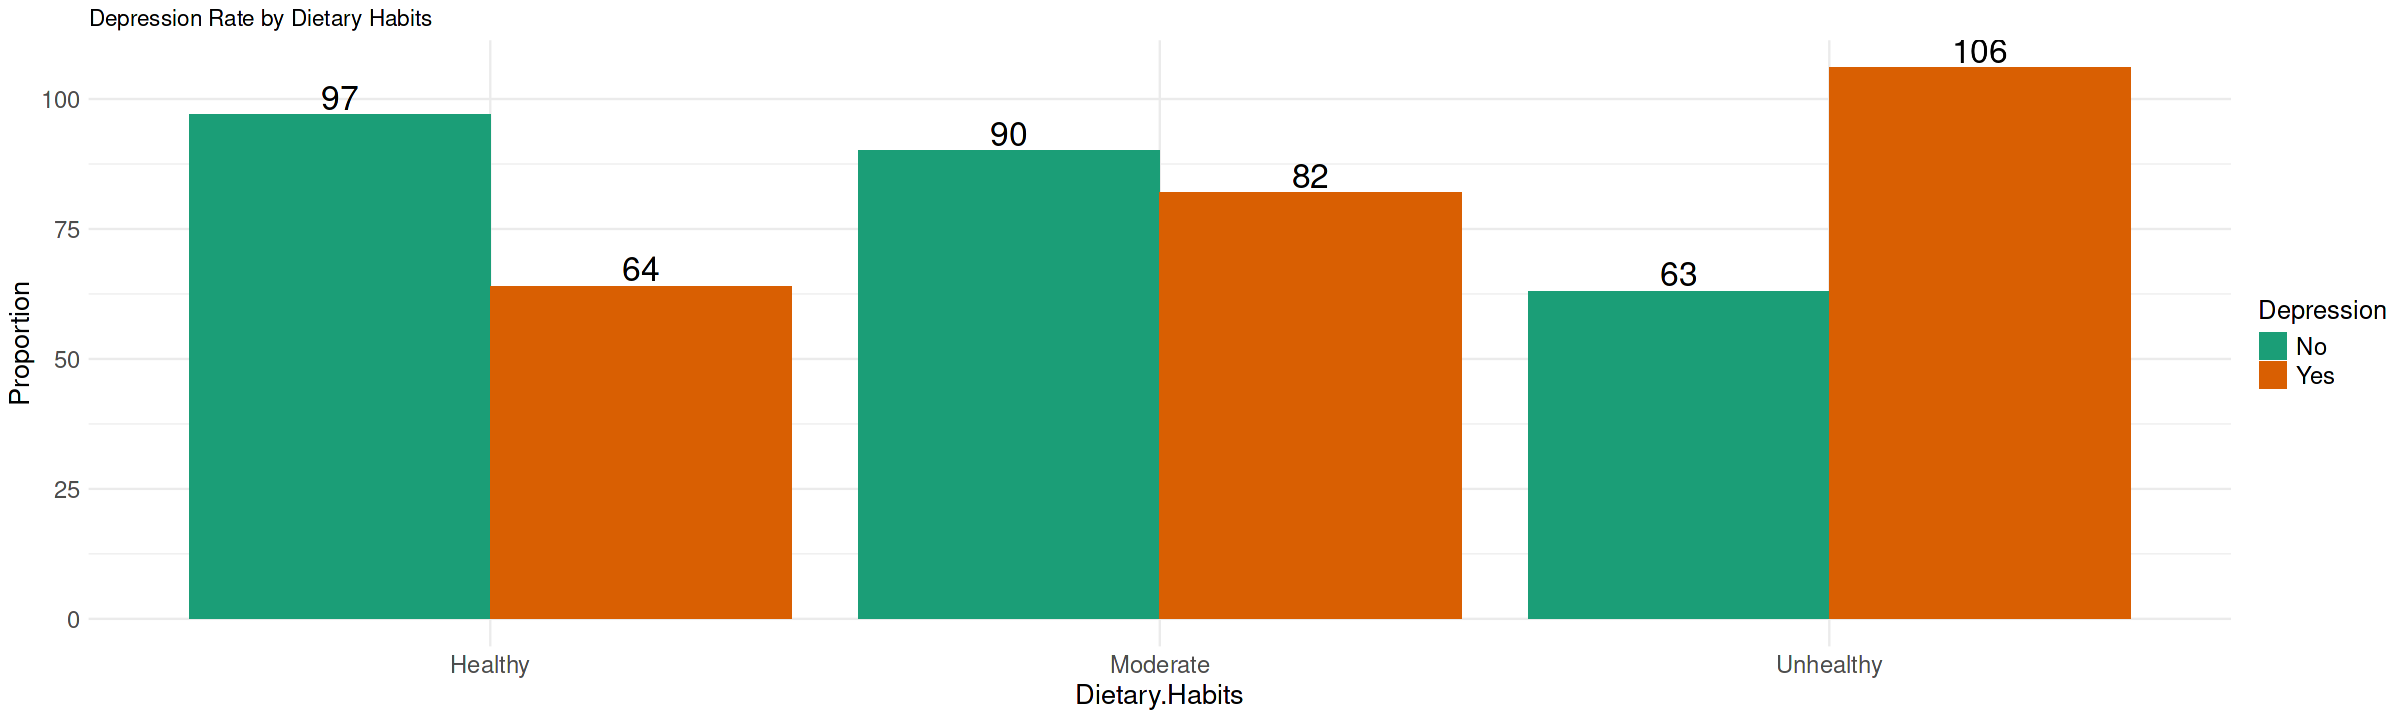

In [56]:
# Prepare count data
diet_count <- depression_df %>%
  count(Dietary.Habits, Depression)

## Plot
options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(diet_count, aes(x = Dietary.Habits, y = n, fill = Depression, text = paste("Depression:", Depression, "<br>Count:", n))) +
  geom_col(position = "dodge") +
  geom_text(aes(label= n),position = position_dodge(width = 0.9), vjust = -0.2, size = 7) +
  labs(title = "Depression Rate by Dietary Habits", y = "Proportion") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
     theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )


> * **The more healthy people eat the less they are depressed.**

## Suicidal Thoughts vs Depression

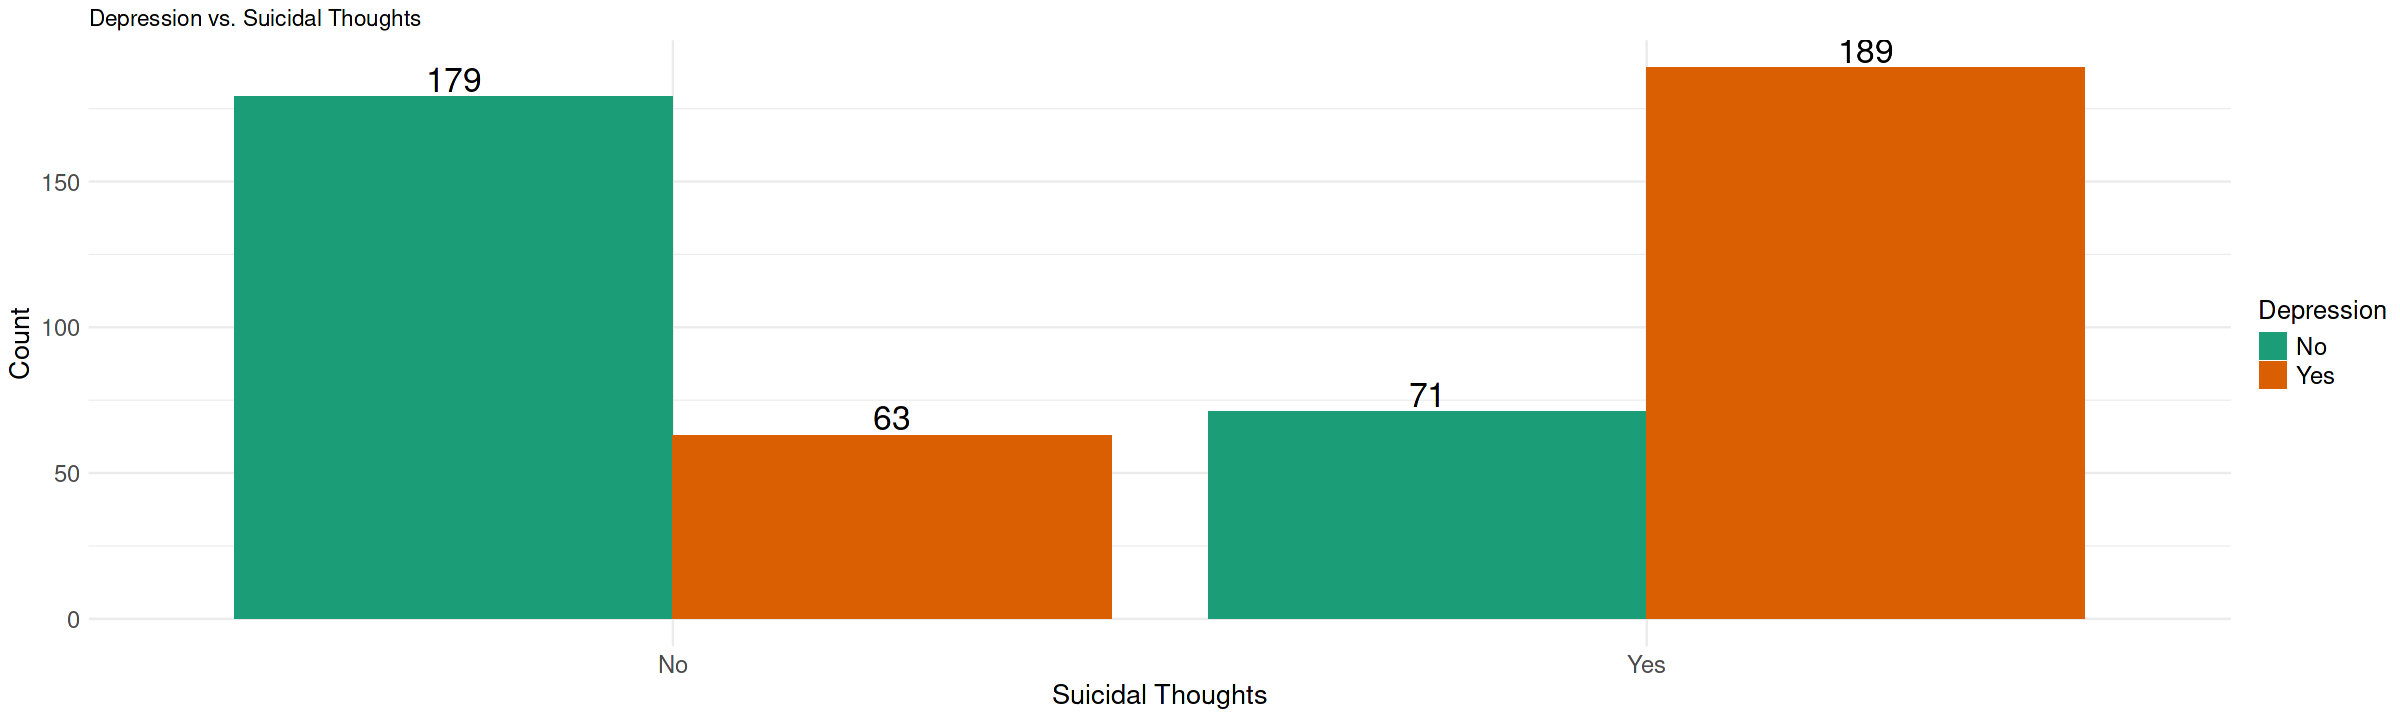

In [58]:
## Count
suicide_plot_data <- depression_df %>%
  group_by(Have.you.ever.had.suicidal.thoughts.., Depression,) %>%
  summarise(Count = n(), .groups = "drop")
## Plot
options(repr.plot.width= 20, repr.plot.height= 6)
ggplot(suicide_plot_data, aes(x = Have.you.ever.had.suicidal.thoughts.., y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(width = 0.9), vjust = -0.2, size = 7) +
  labs(title = "Depression vs. Suicidal Thoughts", x = "Suicidal Thoughts", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
     theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )

> * **Those who ever had suicidal thoughts are more likely to be depressed.**

## Study Satisfaction vs Depression

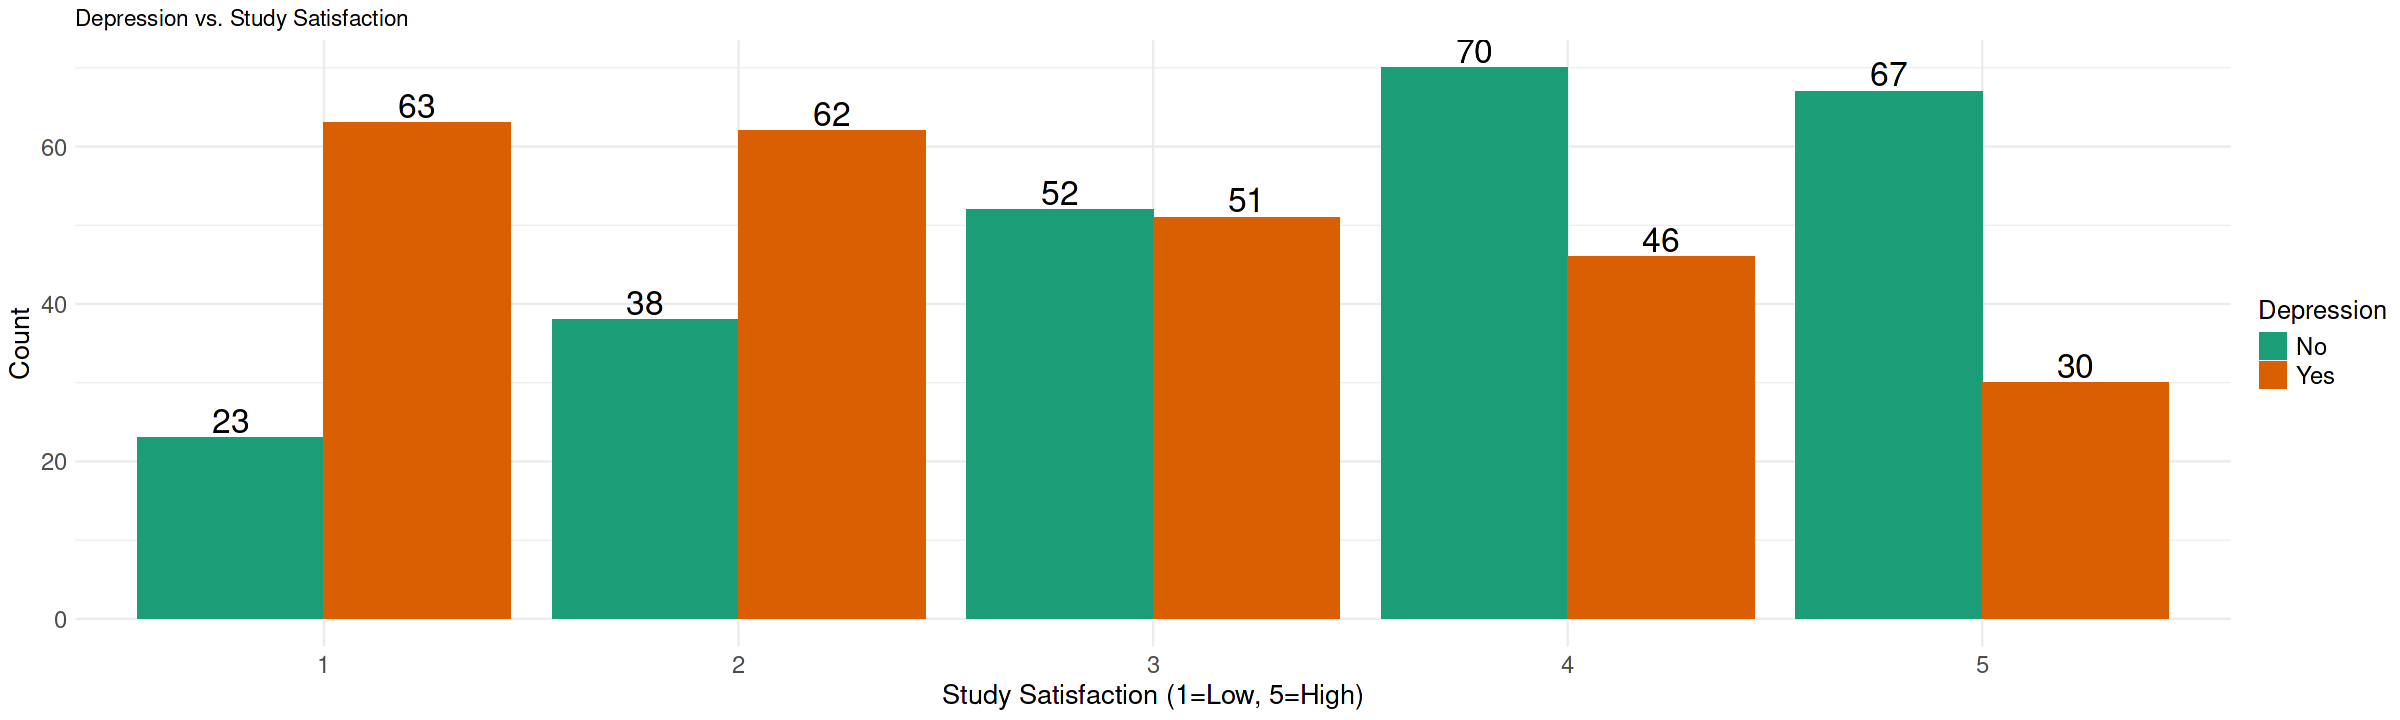

In [60]:
## Count
study_sat_plot_data <- depression_df %>%
  group_by(Study.Satisfaction, Depression) %>%
  summarise(Count = n(), .groups = "drop")

## Plot
options(repr.plot.width= 20, repr.plot.height= 6)
ggplot(study_sat_plot_data, aes(x = factor(Study.Satisfaction), y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(width = 0.9), vjust = -0.2, size = 7) +
  labs(title = "Depression vs. Study Satisfaction", x = "Study Satisfaction (1=Low, 5=High)", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
     theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )

> * **Those who are not satisfied by study are more likely to be depressed,**

## Family History of Mental Illness vs Depression

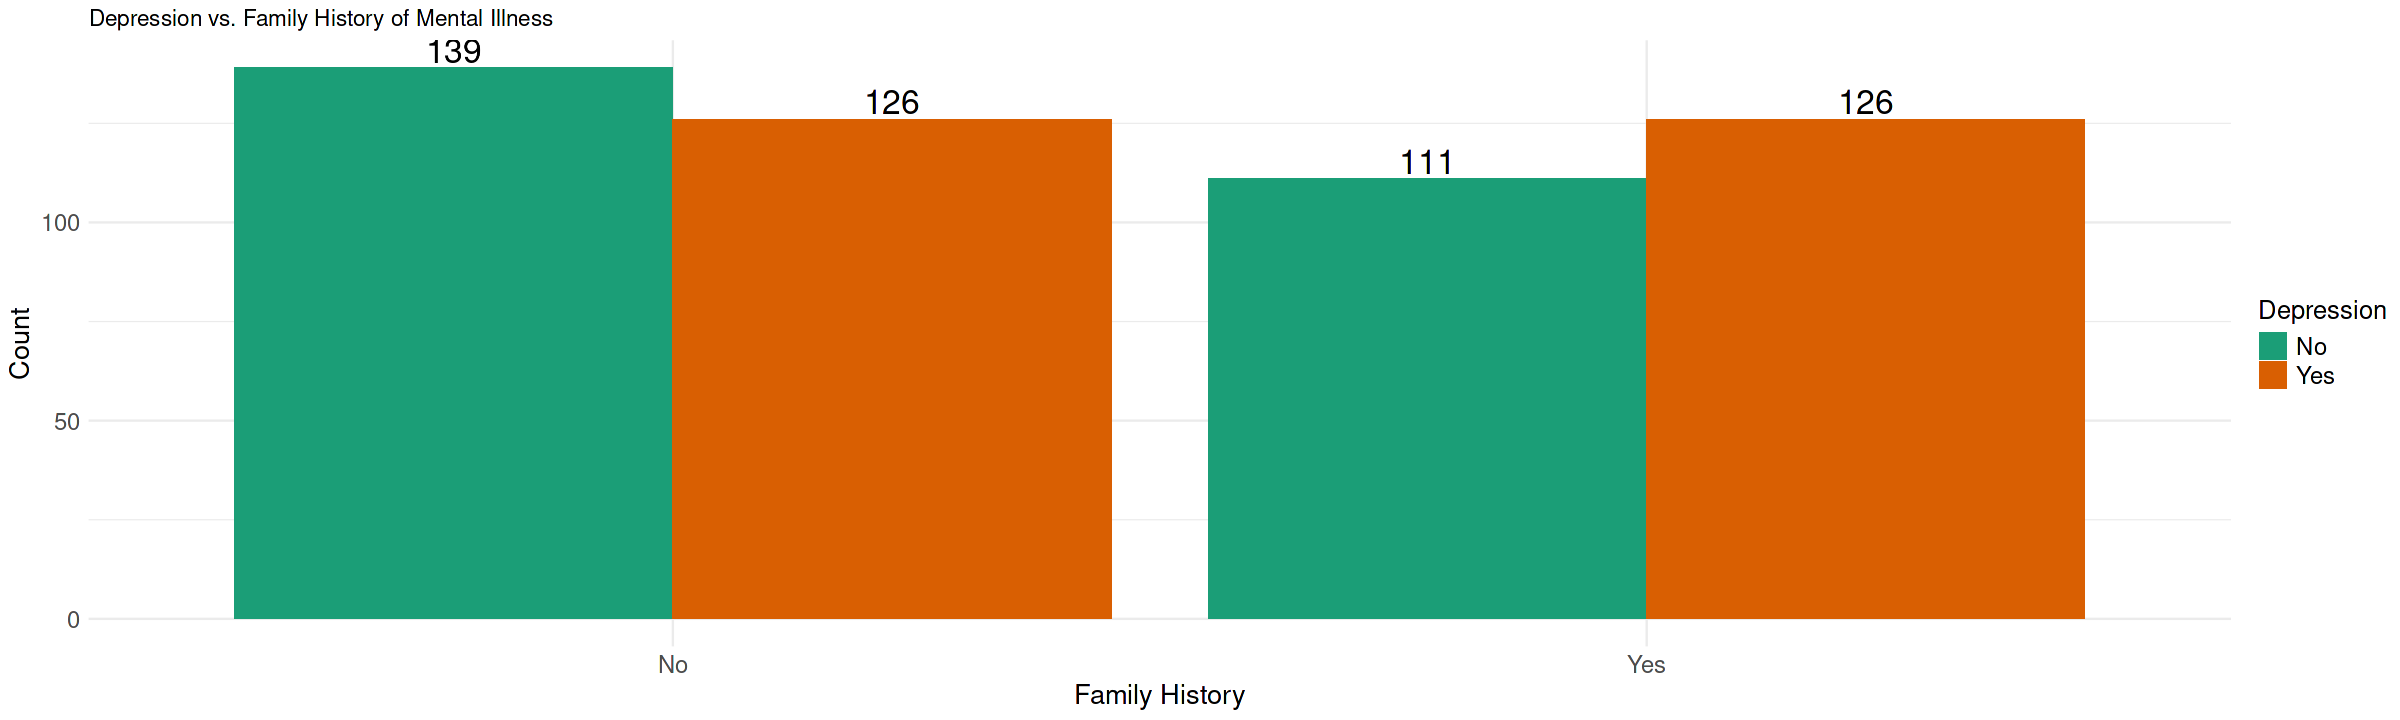

In [61]:
## Count 
family_plot_data <- depression_df %>%
  group_by(Family.History.of.Mental.Illness, Depression) %>%
  summarise(Count = n(), .groups = "drop")

## Plot
options(repr.plot.width= 20, repr.plot.height= 6)
ggplot(family_plot_data, aes(x = Family.History.of.Mental.Illness, y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(width = 0.9), vjust = -0.2, size = 7) +
  labs(title = "Depression vs. Family History of Mental Illness", x = "Family History", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
     theme(
    axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  )

> * **Those who have a family history of mental illness has same number of depressed as those whose family did not. From this visuals it seems family history has nothing to do with depression. However the number of people who do not have family history of mental illness is more than the number of people who have, thus proportion of depressed persons who have family history of mental illness is more than those who do not have family history of mental illness and still depressed. Thus more analysis required as this relation between family history of mental illness and depression could be due to limited sample size.**

# Visualization (Categorizing with gender)

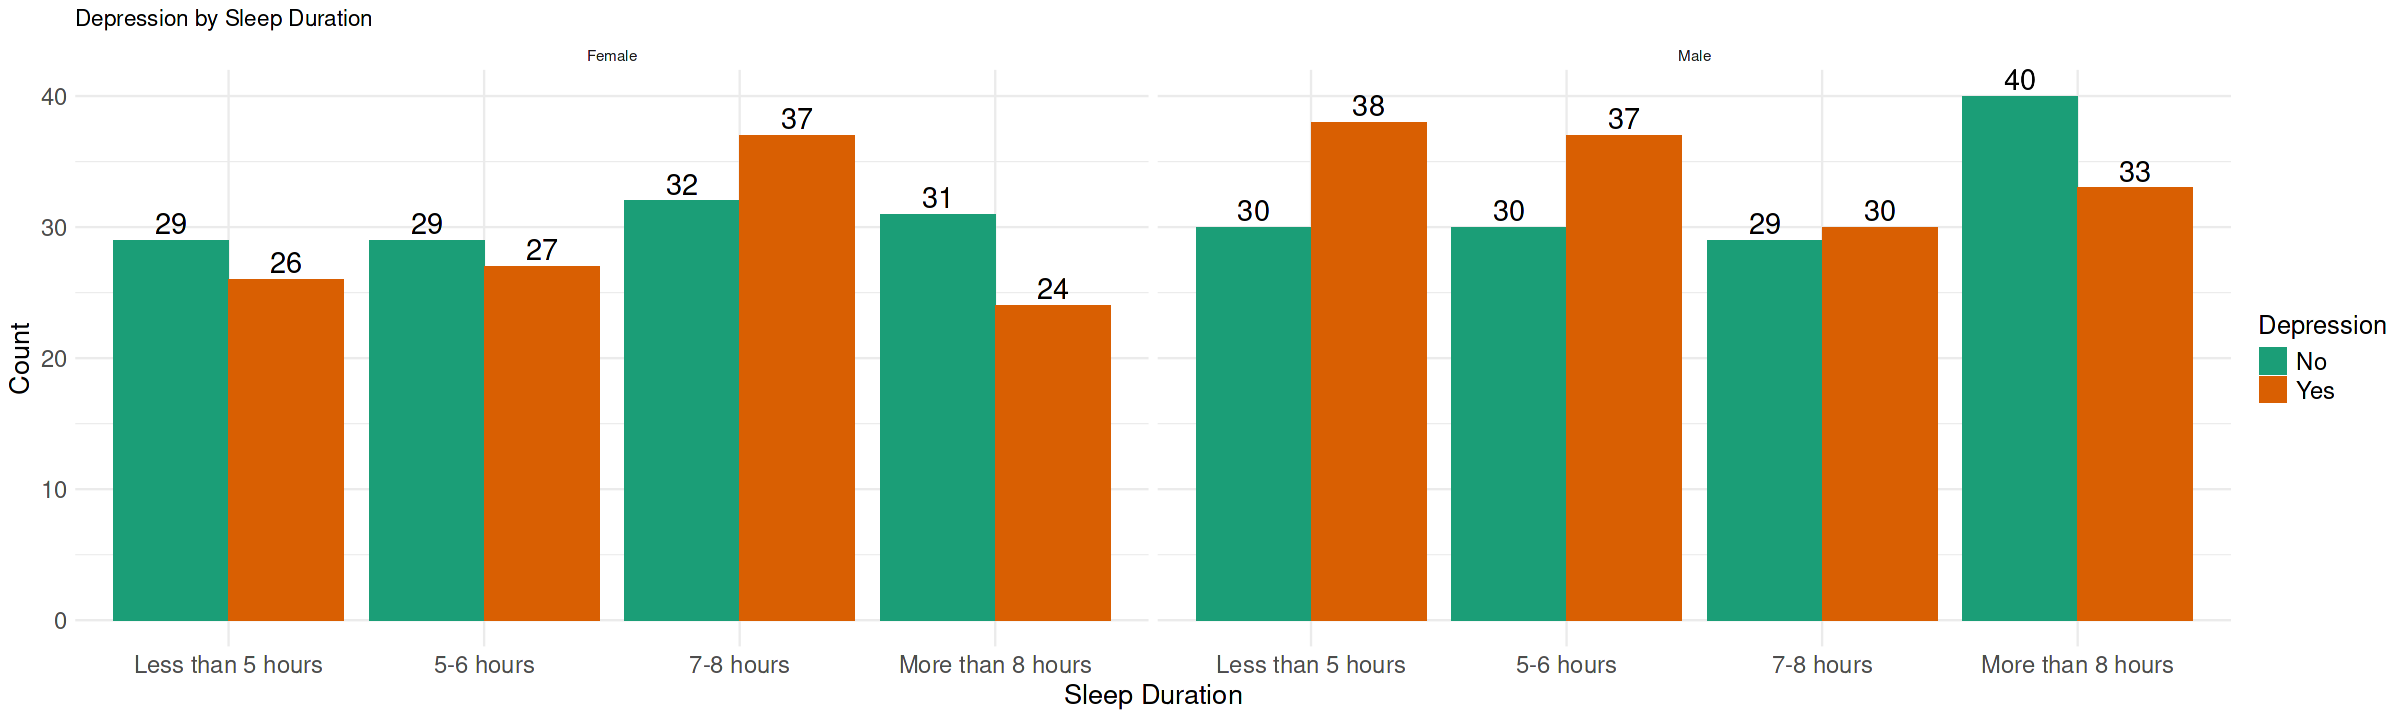

In [68]:
sleep_summary <- depression_df %>%
  group_by(Sleep.Duration, Depression, Gender) %>%
  summarise(Count = n(), .groups = "drop")

ggplot(sleep_summary, aes(x = Sleep.Duration, y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  facet_wrap(~ Gender) +
  geom_text(aes(label = Count), position = position_dodge(0.9), vjust = -0.3, size = 6) +
  labs(title = "Depression by Sleep Duration", x = "Sleep Duration", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  ) 


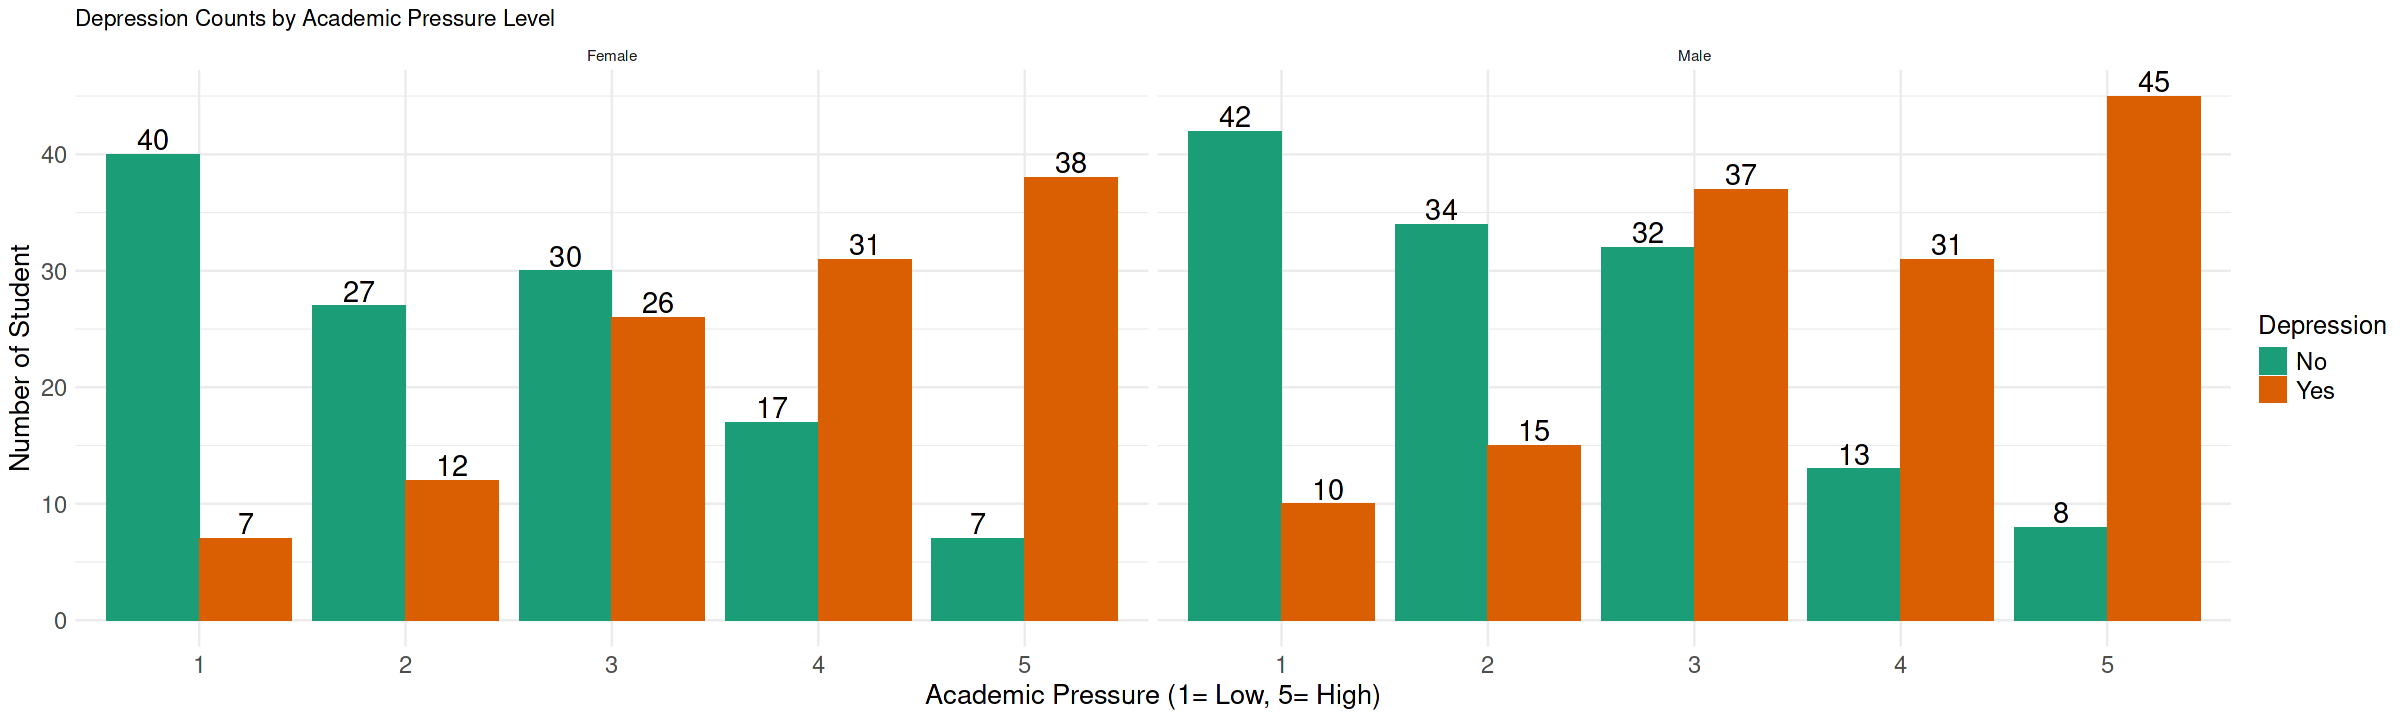

In [71]:
## Group by actual Academic.Pressure value (1 to 5) and Depression
summary <- depression_df %>%
    group_by(Academic.Pressure, Depression,Gender)%>%
     summarise(Count = n(), .groups = "drop")

## Clustered cloumn chart
options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(summary, aes(x= factor(Academic.Pressure), y = Count, fill = Depression)) +
           geom_col(position = "dodge") +
           geom_text(aes(label = Count), position = position_dodge(width= 0.9), vjust = -0.2, size = 6) +
           labs(title = "Depression Counts by Academic Pressure Level",
                x = "Academic Pressure (1= Low, 5= High)",
                y = "Number of Student") +
           scale_fill_brewer(palette = "Dark2") +
           theme_minimal()+
           facet_wrap(~Gender) +
           theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  ) 


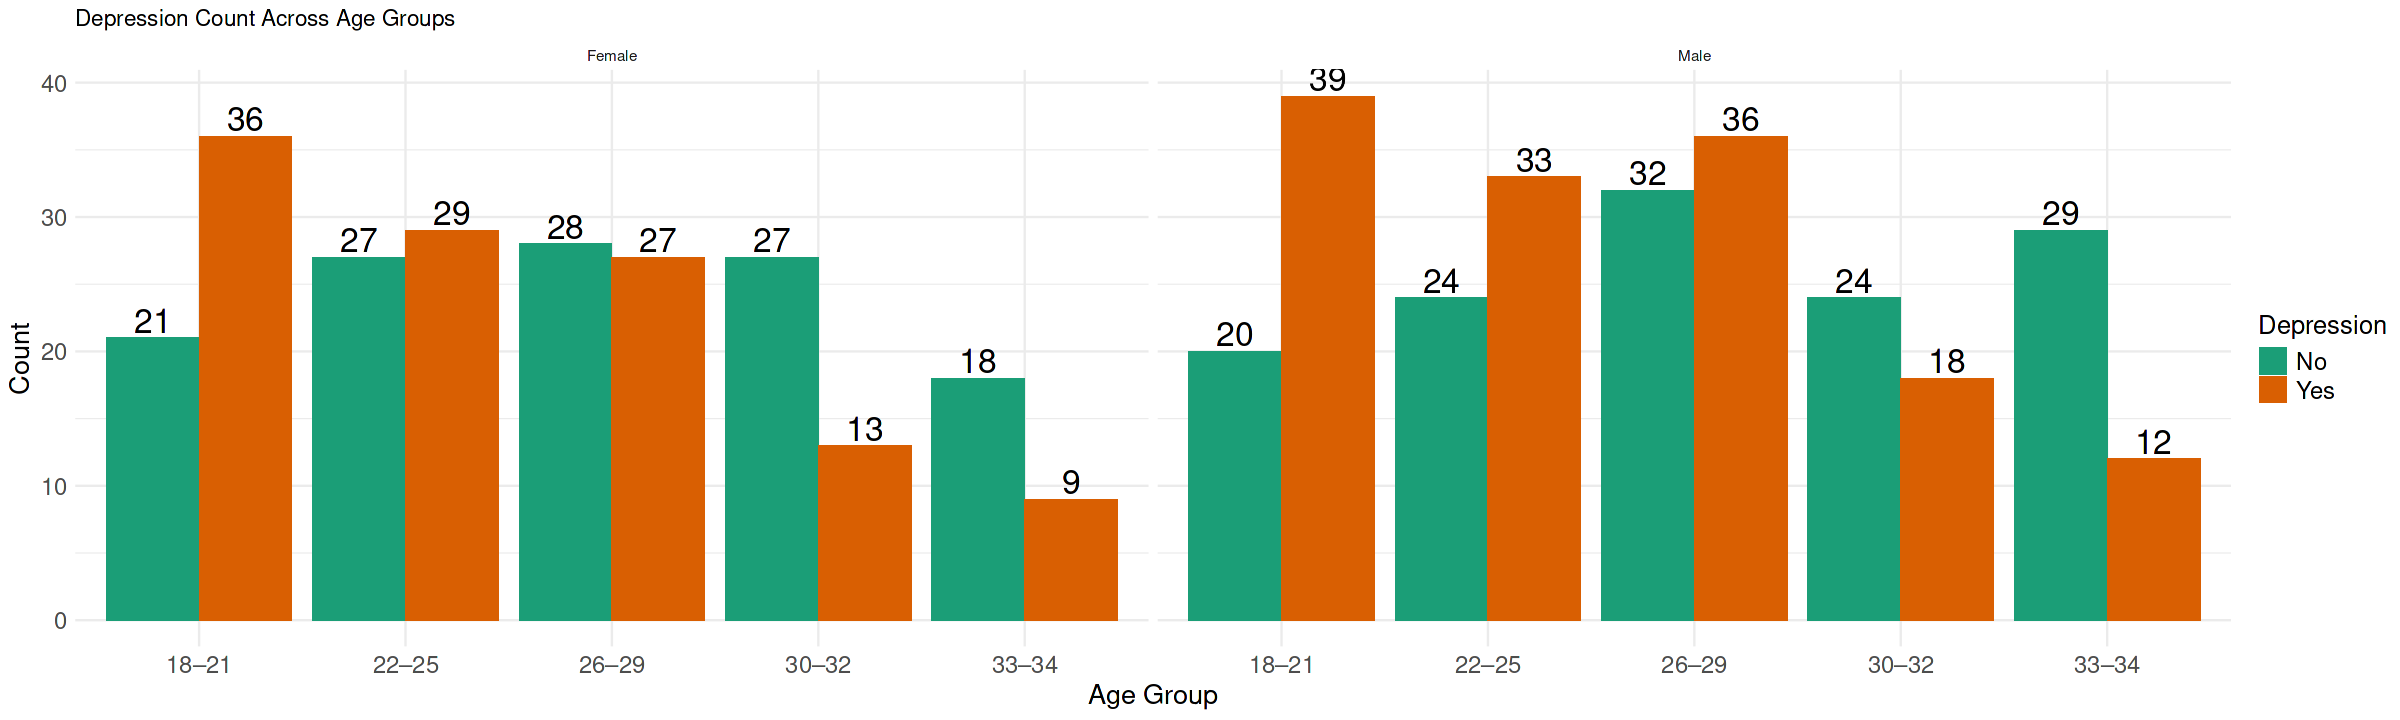

In [72]:
# Create age bins (5 bins: 18–21, 22–25, 26–29, 30–32, 33–34)
depression_df <- depression_df %>%
  mutate(AgeGroup = cut(Age, breaks = c(17, 21, 25, 29, 32, 34),
                        labels = c("18–21", "22–25", "26–29", "30–32", "33–34")))

# Count by age group and depression
age_summary <- depression_df %>%
  group_by(AgeGroup, Depression, Gender) %>%
  summarise(Count = n(), .groups = "drop")

# Plot
options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(age_summary, aes(x = AgeGroup, y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(width= 0.9), vjust= -0.2, size = 7) +
  labs(title = "Depression Count Across Age Groups", x = "Age Group", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal()+
  facet_wrap(~Gender) +
  theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  ) 



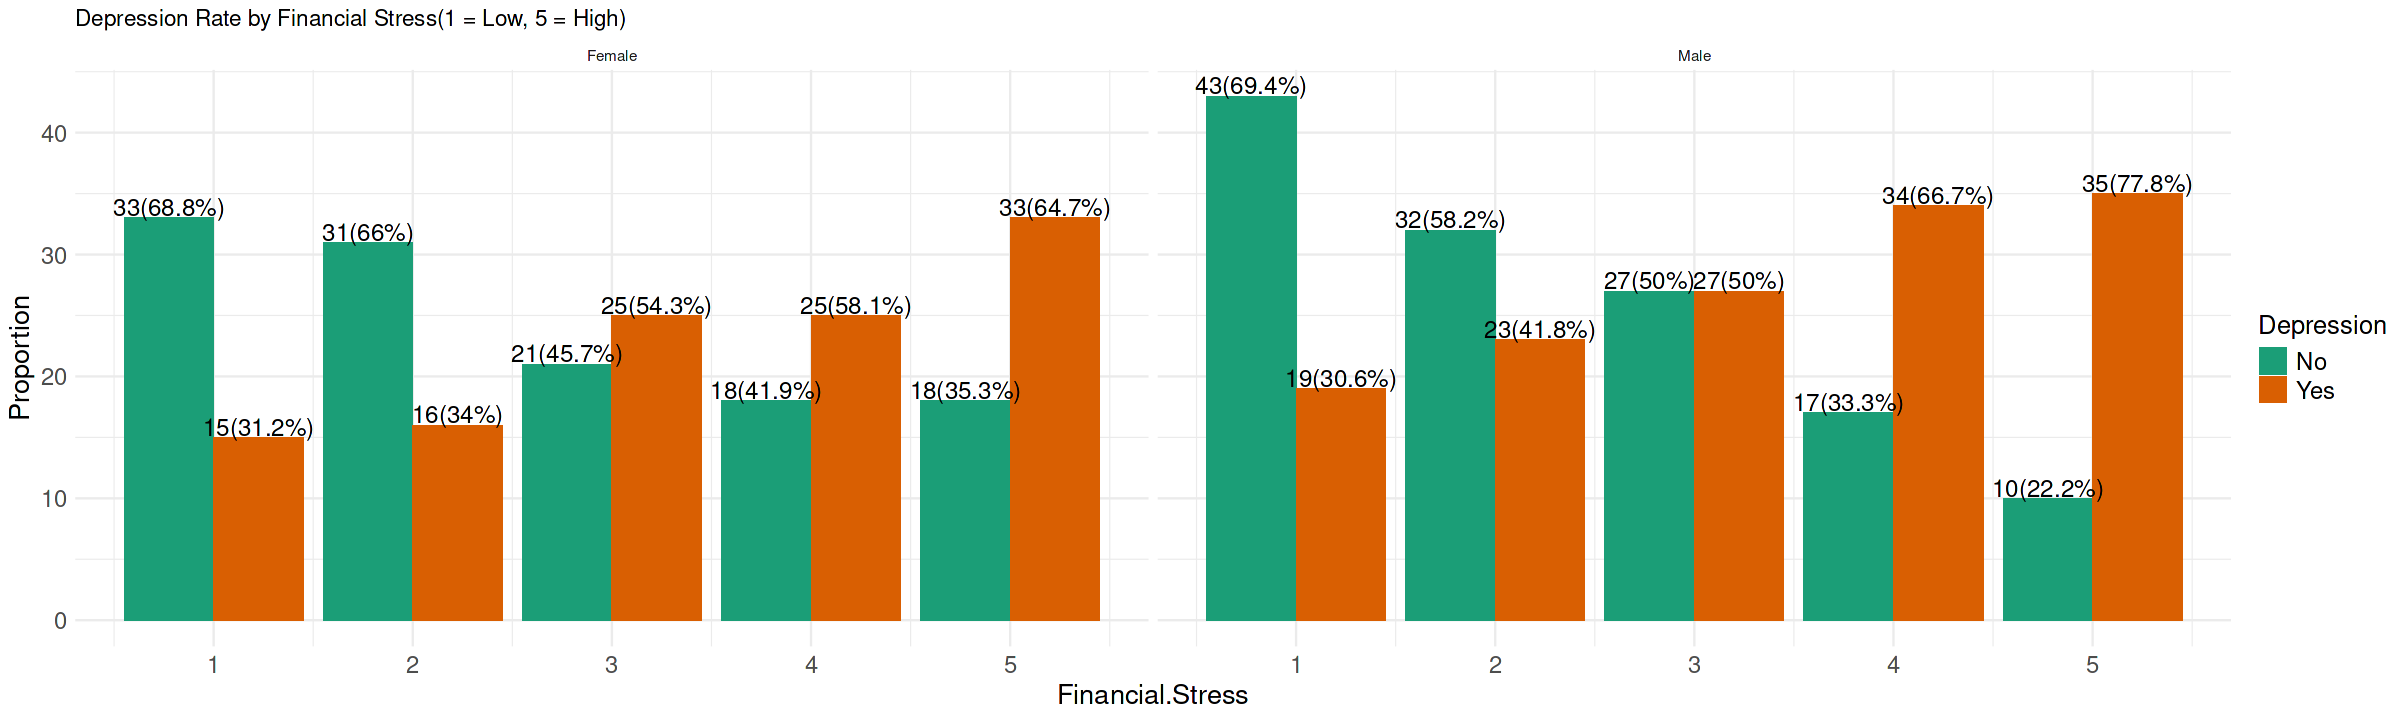

In [86]:
## Count combinations and Compute proportions
fin.cal <- depression_df %>%
  count(Financial.Stress, Depression,Gender) %>%
  group_by(Financial.Stress, Gender) %>%
  mutate(Proportion = n / sum(n),
         label = paste0(round(100 * Proportion, 1), "%"))

## Plot
ggplot(fin.cal, aes(x = Financial.Stress, y=n, fill = Depression)) +
      geom_col(position = "dodge") +
      geom_text(aes(label = paste0(n,"(",label,")")), position = position_dodge(width = 0.9), vjust = -0.1, size = 5) +
      labs(title = "Depression Rate by Financial Stress(1 = Low, 5 = High)", y = "Proportion") +
      scale_fill_brewer(palette = "Dark2") +
      theme_minimal()+
      facet_wrap(~Gender)+
      theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  ) 

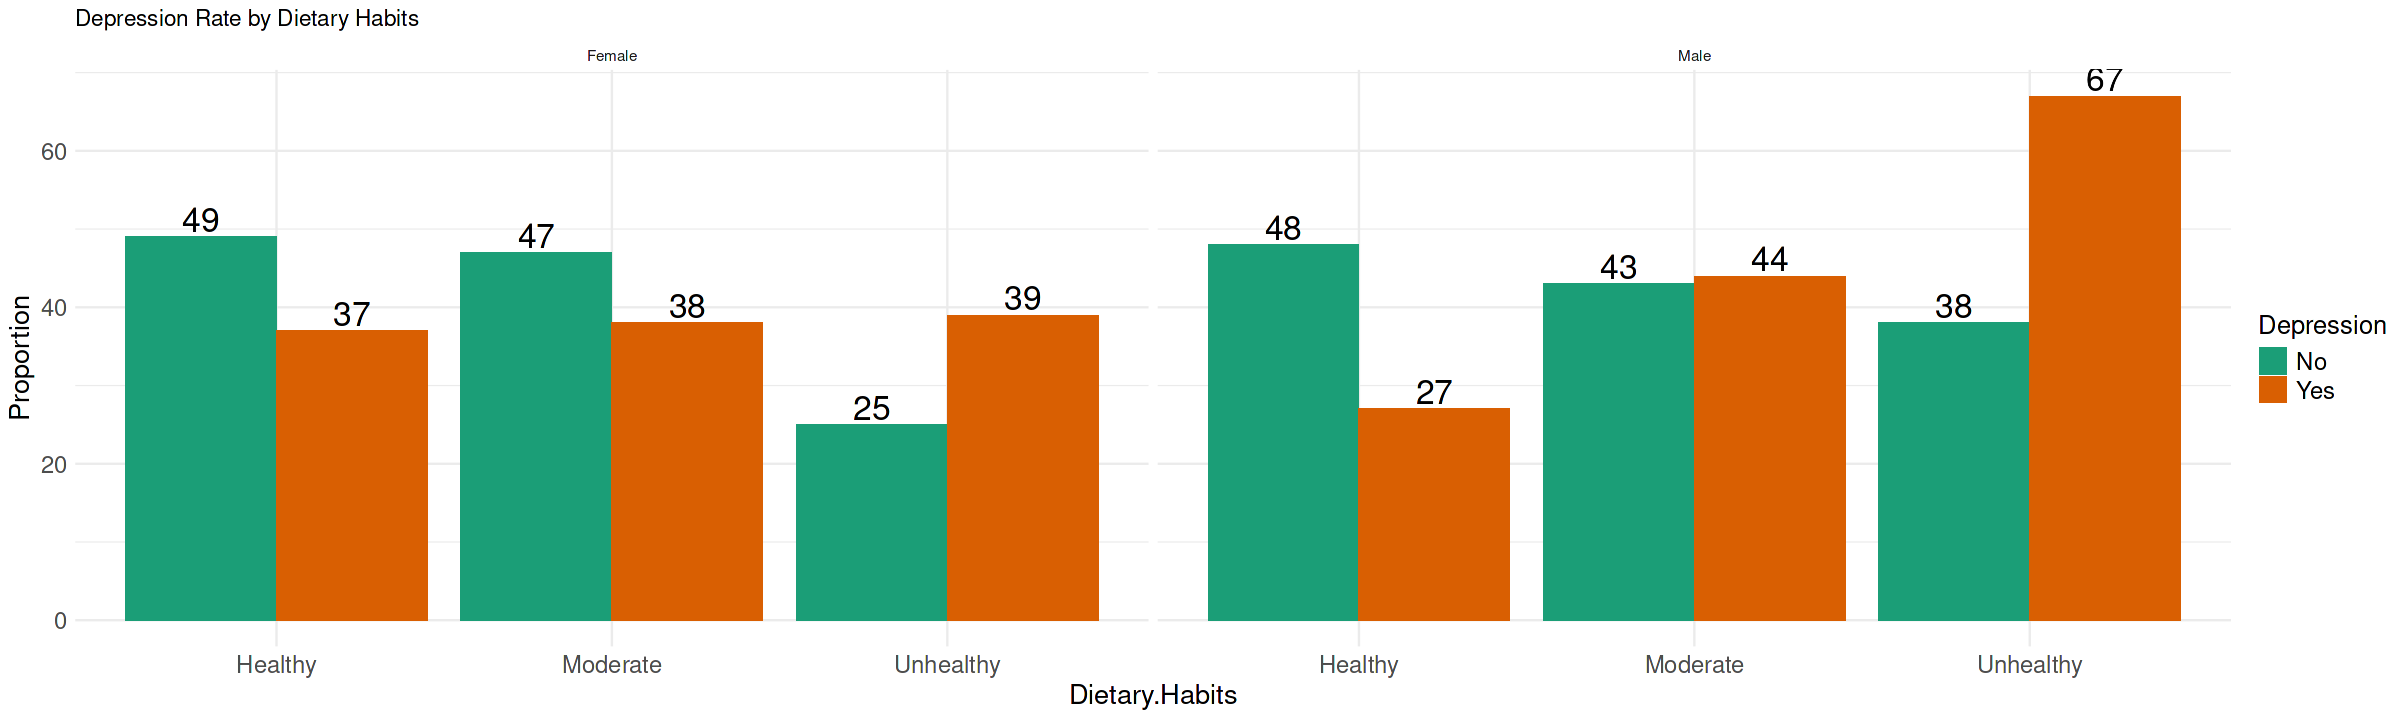

In [75]:
# Prepare count data
diet_count <- depression_df %>%
  count(Dietary.Habits, Depression, Gender)

## Plot
options(repr.plot.width = 20, repr.plot.height = 6)
ggplot(diet_count, aes(x = Dietary.Habits, y = n, fill = Depression, text = paste("Depression:", Depression, "<br>Count:", n))) +
  geom_col(position = "dodge") +
  geom_text(aes(label= n),position = position_dodge(width = 0.9), vjust = -0.2, size = 7) +
  labs(title = "Depression Rate by Dietary Habits", y = "Proportion") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal()+
  facet_wrap(~Gender)+
  theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  ) 


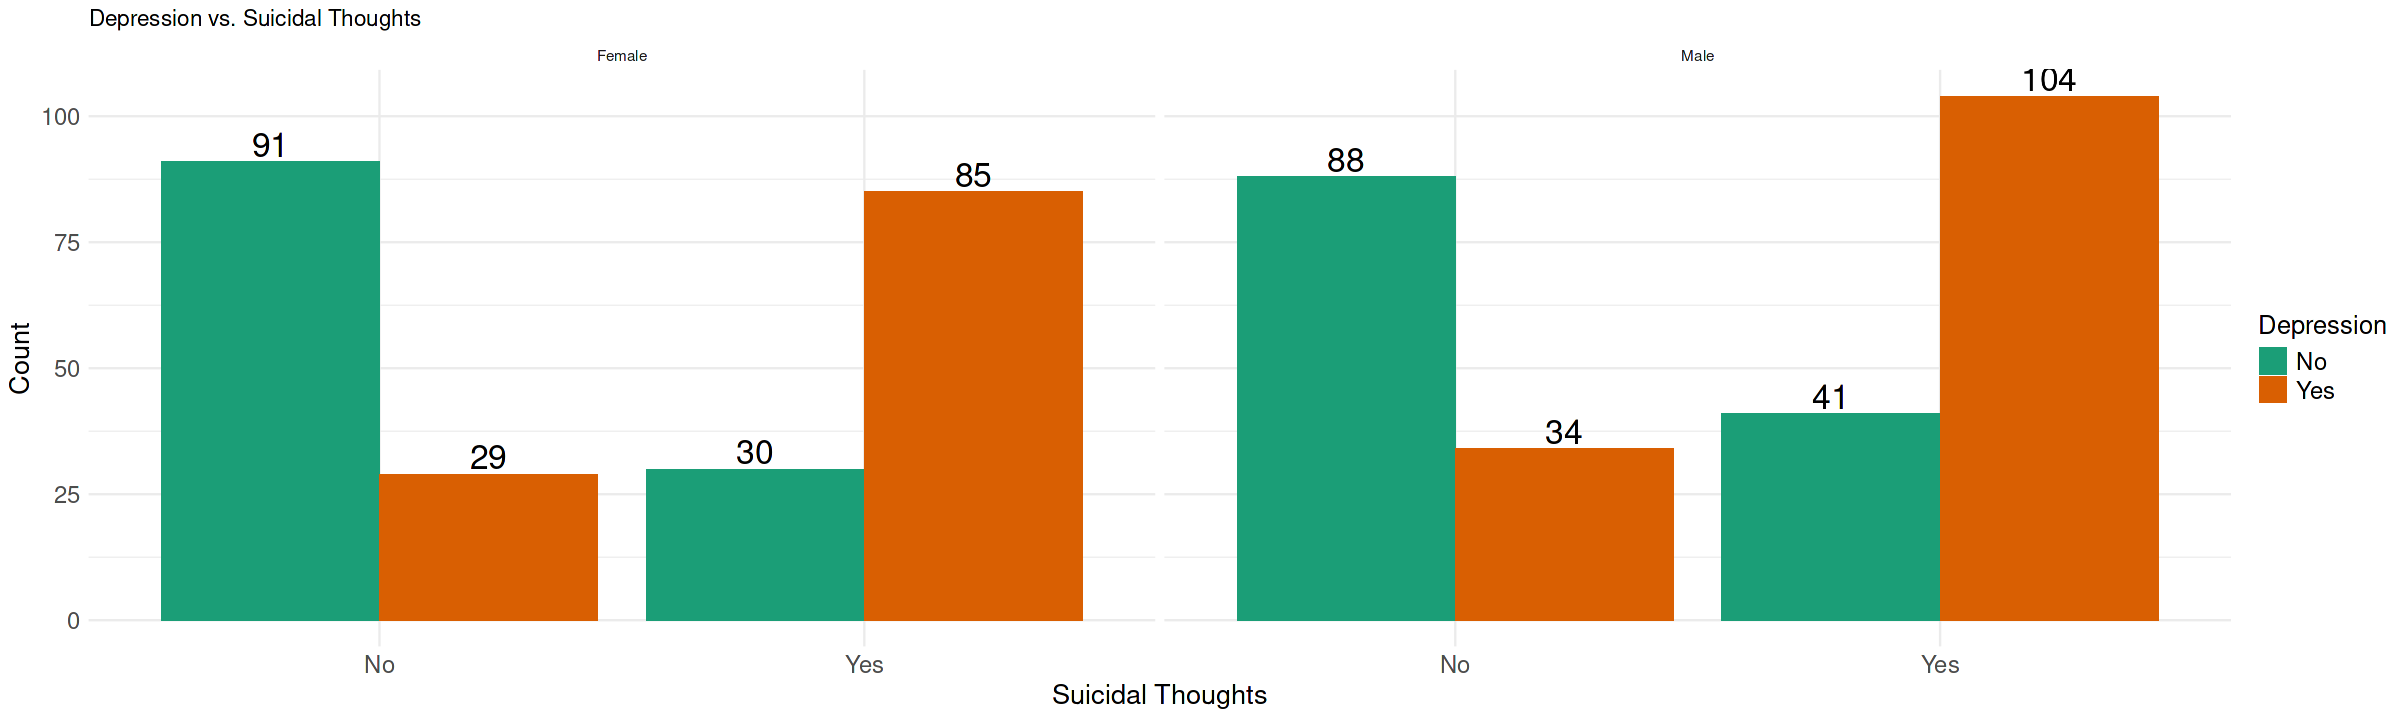

In [76]:
## Count
suicide_plot_data <- depression_df %>%
  group_by(Have.you.ever.had.suicidal.thoughts.., Depression, Gender) %>%
  summarise(Count = n(), .groups = "drop")

## Plot
options(repr.plot.width= 20, repr.plot.height= 6)
ggplot(suicide_plot_data, aes(x = Have.you.ever.had.suicidal.thoughts.., y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(width = 0.9), vjust = -0.2, size = 7) +
  labs(title = "Depression vs. Suicidal Thoughts", x = "Suicidal Thoughts", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
  facet_wrap(~Gender) +
  theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  ) 


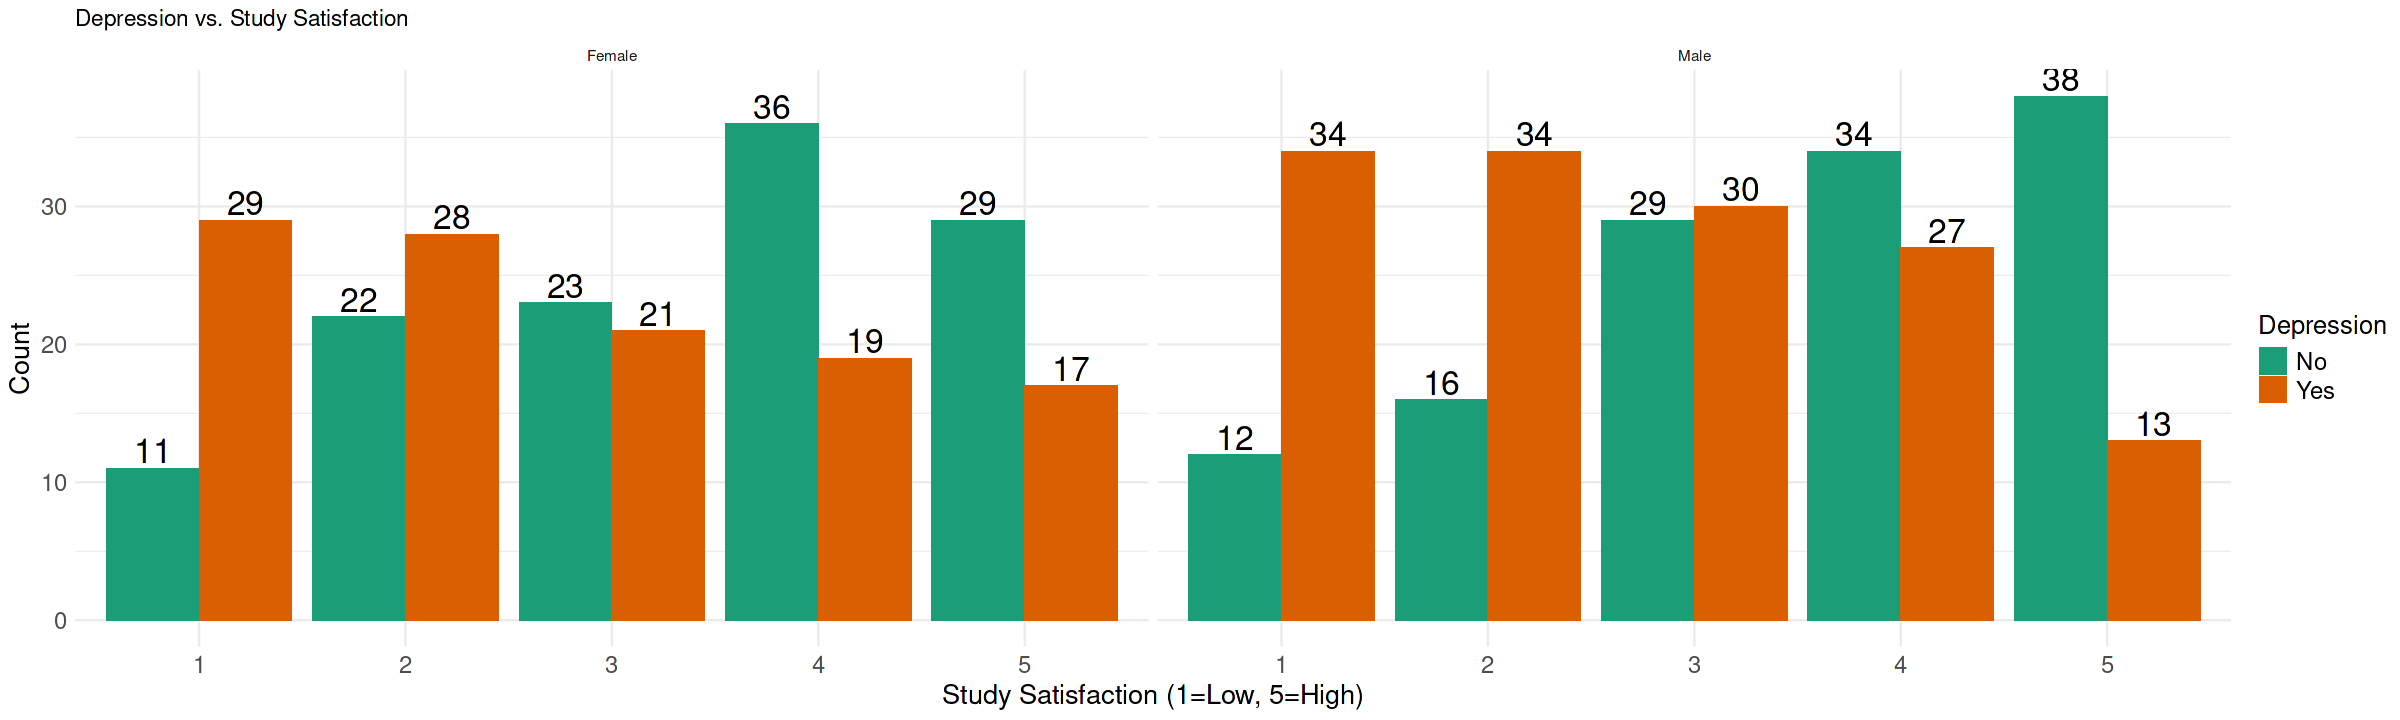

In [77]:
## Count
study_sat_plot_data <- depression_df %>%
  group_by(Study.Satisfaction, Depression, Gender) %>%
  summarise(Count = n(), .groups = "drop")

## Plot
options(repr.plot.width= 20, repr.plot.height= 6)
ggplot(study_sat_plot_data, aes(x = factor(Study.Satisfaction), y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(width = 0.9), vjust = -0.2, size = 7) +
  labs(title = "Depression vs. Study Satisfaction", x = "Study Satisfaction (1=Low, 5=High)", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
  facet_wrap(~Gender) +
  theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  ) 

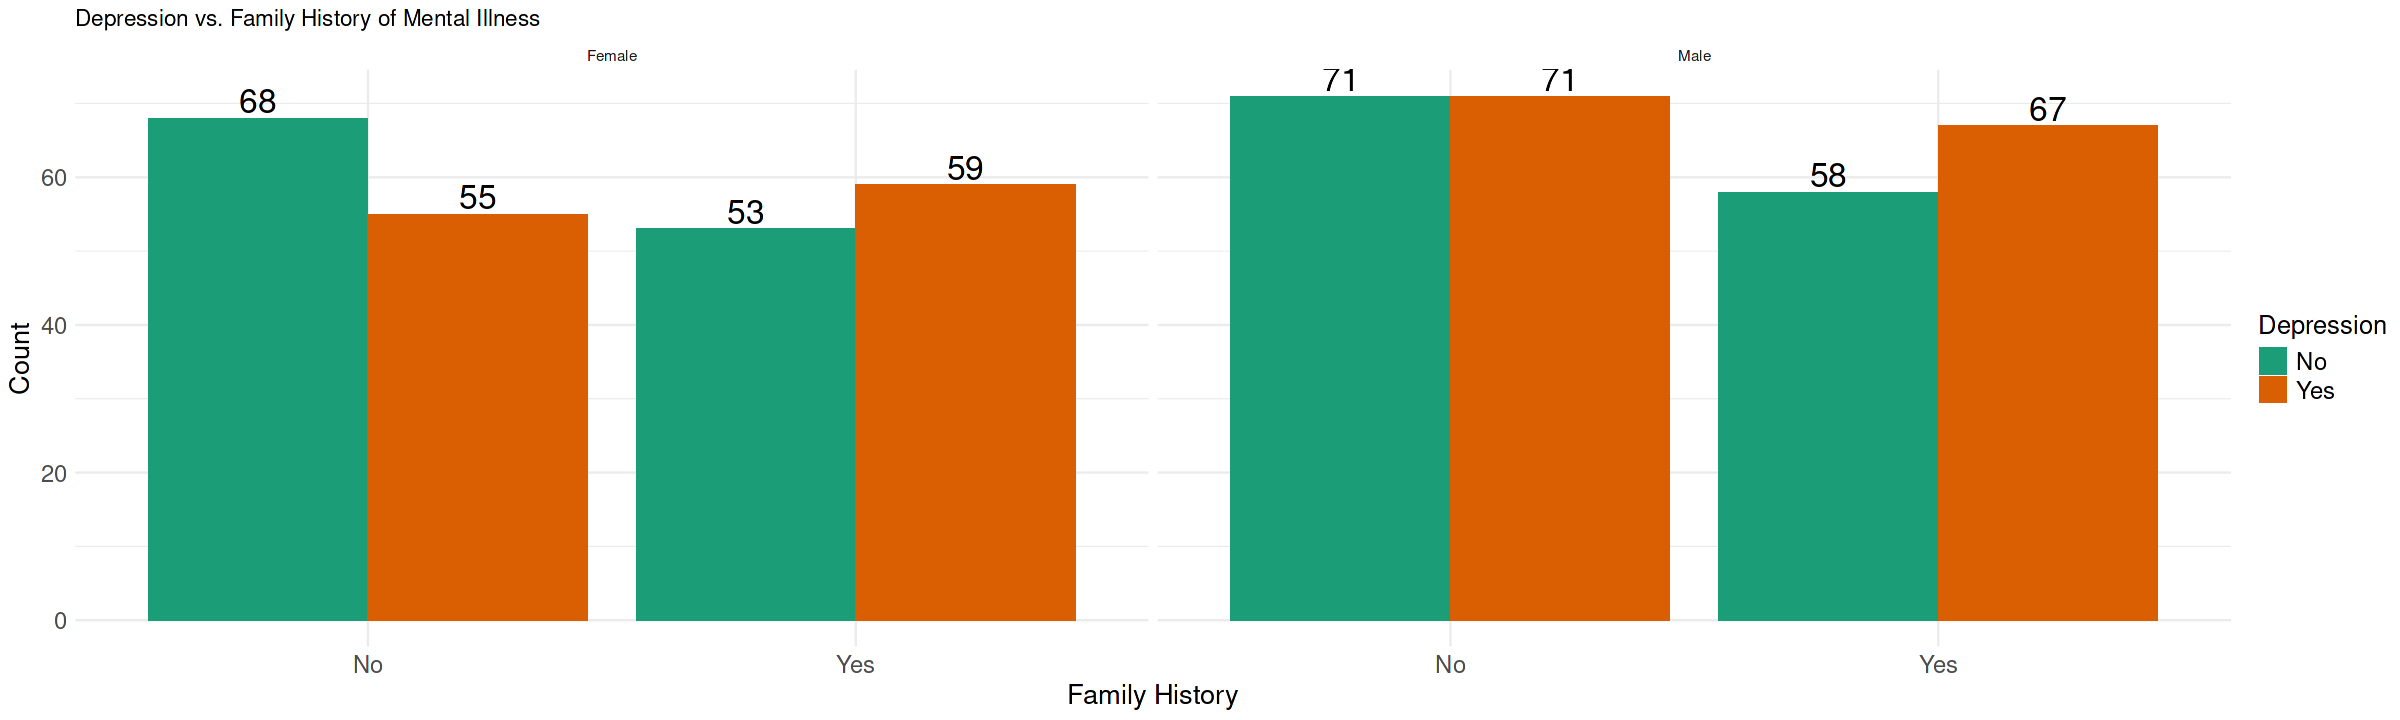

In [78]:
## Count
family_plot_data <- depression_df %>%
  group_by(Family.History.of.Mental.Illness, Depression, Gender) %>%
  summarise(Count = n(), .groups = "drop")

## Plot
options(repr.plot.width= 20, repr.plot.height= 6)
ggplot(family_plot_data, aes(x = Family.History.of.Mental.Illness, y = Count, fill = Depression)) +
  geom_col(position = "dodge") +
  geom_text(aes(label = Count), position = position_dodge(width = 0.9), vjust = -0.2, size = 7) +
  labs(title = "Depression vs. Family History of Mental Illness", x = "Family History", y = "Count") +
  scale_fill_brewer(palette = "Dark2") +
  theme_minimal() +
  facet_wrap(~Gender) +
  theme(axis.text = element_text(size = 14),
    axis.title = element_text(size = 16),
    legend.text = element_text(size = 14),
    legend.title = element_text(size = 15)
  ) 

> ## Conclusion
There seemed to be no difference as in how different metrics affect mental health for different genders.

In [84]:
## Logistical model
model <- glm(Depression ~ Gender + Age + Sleep.Duration + Academic.Pressure + 
               Financial.Stress + Dietary.Habits + Study.Satisfaction + 
               Have.you.ever.had.suicidal.thoughts.. + Family.History.of.Mental.Illness,
             data = depression_df, family = "binomial")

summary(model)


Call:
glm(formula = Depression ~ Gender + Age + Sleep.Duration + Academic.Pressure + 
    Financial.Stress + Dietary.Habits + Study.Satisfaction + 
    Have.you.ever.had.suicidal.thoughts.. + Family.History.of.Mental.Illness, 
    family = "binomial", data = depression_df)

Coefficients:
                                         Estimate Std. Error z value Pr(>|z|)
(Intercept)                              -0.38100    1.59870  -0.238 0.811635
GenderMale                                0.42561    0.45370   0.938 0.348201
Age                                      -0.62001    0.09151  -6.775 1.24e-11
Sleep.Duration5-6 hours                  -1.15546    0.67201  -1.719 0.085540
Sleep.Duration7-8 hours                  -2.51822    0.70058  -3.594 0.000325
Sleep.DurationMore than 8 hours          -3.64325    0.77552  -4.698 2.63e-06
Academic.Pressure                         3.44955    0.45008   7.664 1.80e-14
Financial.Stress                          1.91456    0.29136   6.571 5.00e-11
Dietary.

In [ ]:
# Key Findings

1. Higher academic pressure, financial stress, poor dietary habits, and low study satisfaction significantly increase the likelihood of depression.

2. Individuals with a history of suicidal thoughts or family history of mental illness are at a much higher risk of depression.

3. Longer sleep duration (especially >7 hours) is significantly associated with lower odds of depression.

4. Age is negatively associated, suggesting that younger individuals are more likely to be depressed.

5. Gender (male vs. female) was not a significant predictor in this model.

6. Most predictors show strong significance (p < 0.001).


